In [ ]:
!pip install pytorch-lightning #==1.2.8 --quiet
!pip install transformers #==4.5.1 --quiet
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 585 kB 5.1 MB/s 
     |████████████████████████████████| 140 kB 64.6 MB/s 
     |████████████████████████████████| 419 kB 71.2 MB/s 
     |████████████████████████████████| 596 kB 50.2 MB/s 
     |████████████████████████████████| 1.1 MB 54.6 MB/s 
     |████████████████████████████████| 271 kB 77.4 MB/s 
     |████████████████████████████████| 144 kB 76.8 MB/s 
     |████████████████████████████████| 94 kB 4.7 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 4.9 MB/s 
     |████████████████████████████████| 86 kB 6.8 MB/s 
     |████████████████████████████████| 6.6 MB 48.1 MB/s 
Looking in indexes: h

In [ ]:
#pytorch libraries 
import pytorch_lightning as pl
try:
    from torchmetrics.functional import accuracy, f1_score as f1, auroc
except ImportError:
    from pytorch_lightning.metrics.functional import accuracy, f1, auroc
#from pytorch_lightning.metrics.functional import accuracy, f1, auroc
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger
from tqdm.auto import tqdm
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaTokenizerFast , BertConfig, BertModel,RobertaModel, AdamW, get_linear_schedule_with_warmup, AutoTokenizer, AutoModel, AutoConfig
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, multilabel_confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, plot_precision_recall_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import roc_curve, auc

#Tensorflow libraries
#%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Input, concatenate, GlobalMaxPool1D, Conv1D, LSTM, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from itertools import cycle

import numpy as np
import pandas as pd
import re
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import subprocess
import time
import datetime
import timeit

#import custom modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/DGA_Version_70length/')
import tf_models, data_utils, utils
from init import pt_initialize, tf_initialize
from dga_transformer import DGADataset, DGADataModule, DGATransformer

#jupyter setup
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

#initialization
RANDOM_SEED = 42
pl.seed_everything(RANDOM_SEED)
root = '/content/drive/MyDrive/Colab Notebooks/DGA_Version_70length/'
related_models = ['highnam.h5', 'lstm1_mi.h5', 'n-CDBC.h5']


Global seed set to 42
Global seed set to 42


In [ ]:
amrita = data_utils.read_amrita(f'{root}data/multi', 'tf')
train_df, val_df, test_df = data_utils.read_amrita(f'{root}data/multi')
umudga_df = data_utils.read_data(f'{root}data/multi/biumudga_test.csv')
unknown_df = data_utils.read_data(f'{root}data/multi/unknown_dga.csv')
charbot_df = data_utils.read_data(f'{root}data/multi/charbotsamples.csv')

#read the alexa top 1 million non dga websites
alexa = data_utils.read_data(f'{root}data/multi/alexa.csv')
#split alexa for training and testing
alexa_train = alexa[0:15000]
alexa_test = alexa[15000:]

In [ ]:
mrita = data_utils.read_amrita(f'{root}data/multi', 'tf', labels = 21)

In [ ]:
c = mrita.columns.to_list()

In [ ]:
import random


In [ ]:
domain_sample = {}

for i in range(1, 22):
  domain_sample[c[i]] = mrita[mrita[c[i]] == 1].iloc[random.randint(a=0, b = 500)].domain
domain_sample



{'banjori': 'vnsfleasdfoajbeoeijsljneqe.com',
 'benign': 'vap.lijit.com',
 'corebot': 'ufmxer3lexovsh38k01.ddns.net',
 'dircrypt': 'qrhbkmahjrgd.com',
 'dnschanger': 'sstkormixj.com',
 'fobber': 'qgzgkhodrdowspghs.net',
 'murofet': 'xsojqcqqkzuhwcxkfisv.ru',
 'necurs': 'oksfwtxocksessf.mx',
 'newgoz': '1pim3x98xw9xe1bipdum12k5rwl.com',
 'padcrypt': 'dbbeaeddcdccamea.com',
 'proslikefan': 'ywqlfqsu.eu',
 'pykspa': 'ekcpfkfoi.info',
 'qadars': 'c6o2kmo6s602.net',
 'qakbot': 'wfnvftgzkosrgu.net',
 'ramdo': 'wswamygggoygguge.org',
 'ranbyus': 'ryvoqwtpihkdbqgxc.tw',
 'simda': 'lysifadalapi.com',
 'suppobox': 'fieldfirst.net',
 'symmi': 'txdseoortccsp.ddns.net',
 'tempedreve': 'yydgccymcdsgqw.info',
 'tinba': 'iqeukliffsxo.com'}

In [ ]:
umu = data_utils.read_data(f'{root}data/multi/umudga_test.csv', labels = 21)
domain_sample = {}
c = umu.columns.to_list()
for i in range(1, 22):
  domain_sample[c[i]] = umu[umu[c[i]] == 1].iloc[random.randint(a=0, b = 500)].domain
domain_sample


{'banjori': 'eeyverionirkutskagl.com',
 'benign': 'nvidia.com',
 'corebot': 'hatotyhkt50sl1.ddns.net',
 'dircrypt': 'yrmopwlkd.com',
 'dnschanger': 'blxbigslgk.com',
 'fobber': 'yofyxitpppepnkmhp.net',
 'murofet': 'dmvsdqlzxprtempnpheaedhmsw.ru',
 'necurs': 'cebbolntrj.sx',
 'newgoz': 'rsoubvppa58rgp5qwr1wtm4ue.biz',
 'padcrypt': 'ddcdenalmedfabbn.co.uk',
 'proslikefan': 'uhtdmkzk.eu',
 'pykspa': 'ghqvddsailbu.net',
 'qadars': '4xevslur4x6v.net',
 'qakbot': 'iqgytugszvvqpk.org',
 'ramdo': 'qgqoosuggwyqqago.org',
 'ranbyus': 'mrhnloqsfrmgul.su',
 'simda': 'qetuh.eu',
 'suppobox': 'outsidebanker.net',
 'symmi': 'geemviufikpuqa.ddns.net',
 'tempedreve': 'lamobfitij.net',
 'tinba': 'gocrudpriyrq.pw'}

In [ ]:
#5 6 7 16 18
umu[umu[c[21]] == 1]

,domain,benign,banjori,corebot,dircrypt,dnschanger,fobber,murofet,necurs,newgoz,...,pykspa,qadars,qakbot,ramdo,ranbyus,simda,suppobox,symmi,tempedreve,tinba
15000,okndllkgdjio.in,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15001,cpsrylxemwgu.com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15002,wetwpijrowog.pw,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15003,dcfegodlslqb.com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15004,gxyfbpbcgfnd.net,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,jmiedhuqbsvi.com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15996,oursreqboqrj.ru,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15997,vyfrowlmridf.xyz,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15998,eexuvwtwvopp.net,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# **Amrita Dataset**

In [ ]:
LABEL_COLUMNS = amrita.columns.tolist()[:2] # 0 for DGA and 1 for benign
LABEL_COLUMNS

['domain', 'benign']

In [ ]:
#store testing data
training_stats = []
testing_record = []
THRESHOLD, upper, lower = 0.5, 1 , 0 
device_name = utils.get_tf_device()
test_time = time.time() 

#Compute ROC curve and ROC area
def get_tf_fpr_fnr(y_pred, y_test, n_classes=1):
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_pred)
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  #print('Micro = ', roc_auc["micro"])

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
  lw = 2
  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


  return fpr, tpr, roc_auc

#compute dga-transformer tpr and fpr
def get_pt_fpr_tpr(y_pred, y_test, n_classes = 1):
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
  lw = 2
  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  return fpr, tpr, roc_auc

  

def add_stats(model_name, dataset, acc, prec, fscore, recall, test_time, DGAs, benign, aucurve):
  # Record all statistics from this epoch.
  training_stats.append(
      {
          'Model_Name':model_name,
          'Dataset': dataset,
          'Test Time': test_time,
          'Accuracy': acc,
          'Precision': prec,
          'Recall': recall,
          'F Score': fscore,
          'AUROC': aucurve,
          'DGA Samples':DGAs,
          'Benign Samples': benign
      }
  )


def test_model(model, X_test):
  t0 = time.time() 
  predictions = model.predict(X_test, verbose=True)
  test_time = utils.format_time(time.time() - t0)
  #yhat = model.predict_classes(X_test)
  #yhat = model.predict_proba(X_test)  
  return predictions.flatten(), test_time

#load and test the

def tokenizing_tf_data(dataframe = None, maxlen = 128):
  #prepare the character based tokenizer
  tk, MAX_INDEX = tf_models.prepare_tokenizer(maxlen = maxlen)
  X, y, class_list, classes = tf_models.text_2_sequence(dataframe, tk, maxlen)

  #split data into train, test, val
  X_train, X_test_, y_train, y_test_ = train_test_split(X, y, test_size=0.20, random_state=42)
  X_val, X_test, y_val, y_test = train_test_split(X_test_, y_test_, test_size=0.50, random_state=42)
  return X_val, X_test, y_val, y_test

def tokenizing_tf_testdata(dataframe = None, maxlen = 128):
  #prepare the character based tokenizer
  tk, MAX_INDEX = tf_models.prepare_tokenizer(maxlen = maxlen)
  X, y, class_list, classes = tf_models.text_2_sequence(dataframe, tk, maxlen)

  return X, y
  


In [ ]:
X_val, X_test, y_val, y_test = tokenizing_tf_data(dataframe = amrita, maxlen = tf_initialize.MAX_STRING_LENGTH)



Long of characters dictionary 70


In [ ]:

#start testing
total_stats = {}
#with tf.device(device_name):
model_name = 'highnam.h5'
high_model = tf_models.build_highnam()

#load the pretrained model    
high_trained_model =  tf.keras.models.load_model(f'{root}models/{model_name}')
high_predictions, high_test_time = test_model(high_trained_model, X_test)
high_y_pred = np.where(high_predictions > THRESHOLD, upper, lower)

#Confusion Matrix
high_conf_matrix = confusion_matrix(y_test, high_y_pred)

#Accuracy
high_acc = accuracy_score(y_test, high_y_pred)

#Compute AUROC
print("AUROC per tag")
for i, name in enumerate([LABEL_COLUMNS[1:]]):
  high_tag_auroc = roc_auc_score(y_test, high_y_pred)
  print(f"{name}: {high_tag_auroc}")

#Compute  classification report 
high_class_rpt = classification_report(y_test, high_y_pred, digits=4)
print(high_conf_matrix)
print(high_acc)
print(high_class_rpt)

1244/1244 [==============================] - 21s 8ms/step
AUROC per tag
['benign']: 0.991375763224951
[[29648    30]
 [  164  9936]]
0.9951229322741214
              precision    recall  f1-score   support

           0     0.9945    0.9990    0.9967     29678
           1     0.9970    0.9838    0.9903     10100

    accuracy                         0.9951     39778
   macro avg     0.9957    0.9914    0.9935     39778
weighted avg     0.9951    0.9951    0.9951     39778



In [ ]:
scores = []
for i in high_class_rpt.split(' '):
  if i !='':
    scores.append(i.strip())

prec = float(scores[-9])
recall = float(scores[-8])
fscore = float(scores[-7])
print(prec, fscore, recall)
add_stats('Highnam', 'Amrita DGA', round(high_acc.item(),3), prec, fscore, recall, high_test_time, test_df[test_df['benign']==0].shape[0], test_df[test_df['benign']==1].shape[0], round(high_tag_auroc.item(),3))

0.9957 0.9935 0.9914


In [ ]:
X_val, X_test, y_val, y_test = tokenizing_tf_data(dataframe = amrita)
#with tf.device(device_name):
model_name = 'lstm1_mi.h5'
m1_model = tf_models.build_LSTM_MI_model(tf_initialize.MAX_INDEX, tf_initialize.MAX_STRING_LENGTH)

#load the pretrained model    
m1_trained_model =  tf.keras.models.load_model(f'{root}models/{model_name}')
m1_predictions, m1_test_time = test_model(m1_trained_model, X_test)
m1_y_pred = np.where(m1_predictions > THRESHOLD, upper, lower)

#Confusion Matrix
m1_conf_matrix = confusion_matrix(y_test, m1_y_pred)

#Accuracy
m1_acc = accuracy_score(y_test, m1_y_pred)

#Compute AUROC
print("AUROC per tag")
for i, name in enumerate([LABEL_COLUMNS[1:]]):
  m1_tag_auroc = roc_auc_score(y_test, m1_y_pred)
  print(f"{name}: {m1_tag_auroc}")

#Compute  classification report 
m1_class_rpt = classification_report(y_test, m1_y_pred, digits=4)
print(m1_conf_matrix)
print(m1_acc)
print(m1_class_rpt)

Long of characters dictionary 70
1244/1244 [==============================] - 5s 4ms/step
AUROC per tag
['benign']: 0.9882231062246328
[[29073   605]
 [   32 10068]]
0.9839861229825532
              precision    recall  f1-score   support

           0     0.9989    0.9796    0.9892     29678
           1     0.9433    0.9968    0.9693     10100

    accuracy                         0.9840     39778
   macro avg     0.9711    0.9882    0.9792     39778
weighted avg     0.9848    0.9840    0.9841     39778



In [ ]:
scores = []
for i in m1_class_rpt.split(' '):
  if i !='':
    scores.append(i.strip())

prec = float(scores[-9])
recall = float(scores[-8])
fscore = float(scores[-7])
print(prec, fscore, recall)
add_stats('LSTM1.MI', 'Amrita DGA', round(m1_acc.item(),3), prec, fscore, recall, m1_test_time, test_df[test_df['benign']==0].shape[0], test_df[test_df['benign']==1].shape[0], round(m1_tag_auroc.item(),3))

0.9711 0.9792 0.9882


In [ ]:
X_val, X_test, y_val, y_test = tokenizing_tf_data(dataframe = amrita, maxlen = tf_initialize.MAX_STRING_LENGTH)
#with tf.device(device_name):
model_name = 'n-CDBC.h5'
CBDC_model = tf_models.build_CBDC()

#load the pretrained model    
CBDC_trained_model =  tf.keras.models.load_model(f'{root}models/{model_name}')
CBDC_predictions, CBDC_test_time = test_model(CBDC_trained_model, X_test)
CBDC_y_pred = np.where(CBDC_predictions > THRESHOLD, upper, lower)

#Confusion Matrix
CBDC_conf_matrix = confusion_matrix(y_test, CBDC_y_pred)

#Accuracy
CBDC_acc = accuracy_score(y_test, CBDC_y_pred)

#Compute AUROC
print("AUROC per tag")
for i, name in enumerate([LABEL_COLUMNS[1:]]):
  CBDC_tag_auroc = roc_auc_score(y_test, CBDC_y_pred)
  print(f"{name}: {CBDC_tag_auroc}")

#Compute  classification report 
CBDC_class_rpt = classification_report(y_test, CBDC_y_pred, digits=4)

print(CBDC_conf_matrix)
print(CBDC_acc)
print(CBDC_class_rpt)

Long of characters dictionary 70
1244/1244 [==============================] - 4s 3ms/step
AUROC per tag
['benign']: 0.9932538387270898
[[29639    39]
 [  123  9977]]
0.9959273970536477
              precision    recall  f1-score   support

           0     0.9959    0.9987    0.9973     29678
           1     0.9961    0.9878    0.9919     10100

    accuracy                         0.9959     39778
   macro avg     0.9960    0.9933    0.9946     39778
weighted avg     0.9959    0.9959    0.9959     39778



In [ ]:
scores = []
for i in CBDC_class_rpt.split(' '):
  if i !='':
    scores.append(i.strip())

prec = float(scores[-9])
recall = float(scores[-8])
fscore = float(scores[-7])
print(prec, fscore, recall)
add_stats('n-CBDC', 'Amrita DGA', round(CBDC_acc.item(),3), prec, fscore, recall, CBDC_test_time, test_df[test_df['benign']==0].shape[0], test_df[test_df['benign']==1].shape[0], round(CBDC_tag_auroc.item(),3))

0.996 0.9946 0.9933


**Test DGATransformers**

In [ ]:
#deine the tokenizer
tokenizer = RobertaTokenizerFast.from_pretrained(pt_initialize.MODEL_NAME, max_len=pt_initialize.MAX_LENGTH)

#define data
data_module = DGADataModule(
  train_df,
  val_df,
  test_df,
  tokenizer,
  train_batch_size=pt_initialize.TRAIN_BATCH_SIZE,
  val_batch_size= pt_initialize.EVAL_BATCH_SIZE,
  test_batch_size= pt_initialize.EVAL_BATCH_SIZE,
  max_token_len= pt_initialize.MAX_LENGTH, 
  LABELS = train_df.columns.tolist()[1:]
)

#Optimizer scheduler
steps_per_epoch=len(test_df) // pt_initialize.EVAL_BATCH_SIZE
total_testing_steps = steps_per_epoch * pt_initialize.MAX_EPOCH

#We'll use a fifth of the training steps for a warm-up:
warmup_steps = total_testing_steps // 5

#define the model
#model = DGATransformer(test_df.columns.tolist()[1:],n_warmup_steps=warmup_steps, n_training_steps=total_testing_steps )
#Initialize Trainer
#trainer = pl.Trainer(gpus= pt_initialize.AVAIL_GPUS)

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

In [ ]:
checkpoint = '/content/drive/MyDrive/Colab Notebooks/DGA_Version_70length/logs/lightning_logs/domain_name/version_2/checkpoints/epoch=4-step=7815.ckpt'
THRESHOLD = 0.5
dga_trained_model = DGATransformer.load_from_checkpoint(
    checkpoint, 
    LABEL_COLUMNS = test_df.columns.tolist()[1:]
)
dga_trained_model.eval()
dga_trained_model.freeze()

Downloading:   0%|          | 0.00/316M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'roberta.encoder.layer.4.attention.output.LayerNorm.bias', 'roberta.encoder.layer.5.intermediate.dense.bias', 'roberta.encoder.layer.5.attention.output.dense.weight', 'lm_head.layer_norm.bias', 'roberta.encoder.layer.5.attention.output.LayerNorm.bias', 'roberta.encoder.layer.4.attention.self.value.weight', 'roberta.encoder.layer.4.output.dense.weight', 'roberta.encoder.layer.4.attention.self.value.bias', 'roberta.encoder.layer.4.attention.self.key.bias', 'lm_head.decoder.weight', 'roberta.encoder.layer.5.attention.output.dense.bias', 'lm_head.dense.bias', 'roberta.encoder.layer.4.attention.self.query.weight', 'roberta.encoder.layer.5.attention.self.key.weight', 'roberta.encoder.layer.5.output.dense.weight', 'roberta.encoder.layer.5.attention.output.LayerNorm.weight', 'lm_head.bias', 'roberta.encoder.layer.5.intermediate.dense.weight', 'roberta.encoder.l

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dga_trained_model = dga_trained_model.to(device)
LABELS = test_df.columns.tolist()[1:]
test_dataset = DGADataset(
  test_df,
  tokenizer,
  max_token_len=pt_initialize.MAX_LENGTH,
  categories = LABELS
)

dga_predictions = []
dga_labels = []

t0 = time.time()
for item in tqdm(test_dataset):
  _, prediction = dga_trained_model(
    item["input_ids"].unsqueeze(dim=0).to(device), 
    item["attention_mask"].unsqueeze(dim=0).to(device)
  )
  dga_predictions.append(prediction.flatten())
  dga_labels.append(item["labels"].int())

dga_test_time = utils.format_time(time.time() - t0)


dga_predictions = torch.stack(dga_predictions).detach().cpu()
dga_labels = torch.stack(dga_labels).detach().cpu()


  0%|          | 0/39778 [00:00<?, ?it/s]

In [ ]:


dga_acc = accuracy(dga_predictions, dga_labels, threshold=THRESHOLD)
dga_y_pred = dga_predictions.numpy()
y_true = dga_labels.numpy()

upper, lower = 1, 0
dga_y_pred = np.where(dga_y_pred > THRESHOLD, upper, lower)
dga_class_rpt = classification_report(y_true, dga_y_pred, digits=4)

dga_conf_matrix = confusion_matrix(y_true, dga_y_pred)

for i, name in enumerate(test_df.columns.tolist()[1:]):
  dga_tag_auroc = auroc(dga_predictions[:, i], dga_labels[:, i], pos_label=1)

print(dga_conf_matrix)
print(dga_acc)
print(dga_class_rpt)
print(dga_tag_auroc)

[[29492   136]
 [   33 10117]]
tensor(0.9958)
              precision    recall  f1-score   support

           0     0.9989    0.9954    0.9971     29628
           1     0.9867    0.9967    0.9917     10150

    accuracy                         0.9958     39778
   macro avg     0.9928    0.9961    0.9944     39778
weighted avg     0.9958    0.9958    0.9958     39778

tensor(0.9998)


In [ ]:
scores = []
for i in dga_class_rpt.split(' '):
  if i !='':
    scores.append(i.strip())

prec = float(scores[-9])
recall = float(scores[-8])
fscore = float(scores[-7])
print(prec, fscore, recall)
add_stats('DGA-Transformer','Amrita DGA', round(dga_acc.item(),3), prec, fscore, recall, dga_test_time, test_df[test_df['benign']==0].shape[0], test_df[test_df['benign']==1].shape[0], round(dga_tag_auroc.item(),3))

0.9928 0.9944 0.9961


**Final Results**

In [ ]:
stats_df = utils.result_df(training_stats)
stats_df

,Dataset,Test Time,Accuracy,Precision,Recall,F Score,AUROC,DGA Samples,Benign Samples
Model_Name,,,,,,,,,
Highnam,Amrita DGA,0:00:20.950000,0.995,0.996,0.991,0.994,0.991,29628,10150
LSTM1.MI,Amrita DGA,0:00:05.408000,0.984,0.971,0.988,0.979,0.988,29628,10150
n-CBDC,Amrita DGA,0:00:03.598000,0.996,0.996,0.993,0.995,0.993,29628,10150
DGA-Transformer,Amrita DGA,0:03:23.834000,0.996,0.993,0.996,0.994,1.000,29628,10150


In [ ]:
stats_df.to_csv('/content/drive/MyDrive/Colab Notebooks/DGA_Version_70length/results/amrita-6-6-2022-3layers.csv')

**Draw Figures**

In [ ]:
image_path = '/content/drive/MyDrive/Colab Notebooks/DGA_Version_70length/results/images'

#get base models values
high_fpr, high_tpr, high_roc_auc = get_tf_fpr_fnr(high_predictions, y_test)
m1_fpr, m1_tpr, m1_roc_auc = get_tf_fpr_fnr(m1_predictions, y_test)
CBDC_fpr, CBDC_tpr, CBDC_roc_auc = get_tf_fpr_fnr(CBDC_predictions, y_test)

#get DGA_transformer values
dga_fpr, dga_tpr, dga_roc_auc = get_pt_fpr_tpr(dga_predictions.numpy(), dga_labels.numpy())


In [ ]:
dga_roc_auc['macro'], high_roc_auc['micro']

(0.9998229823206779, 0.9994529367688437)

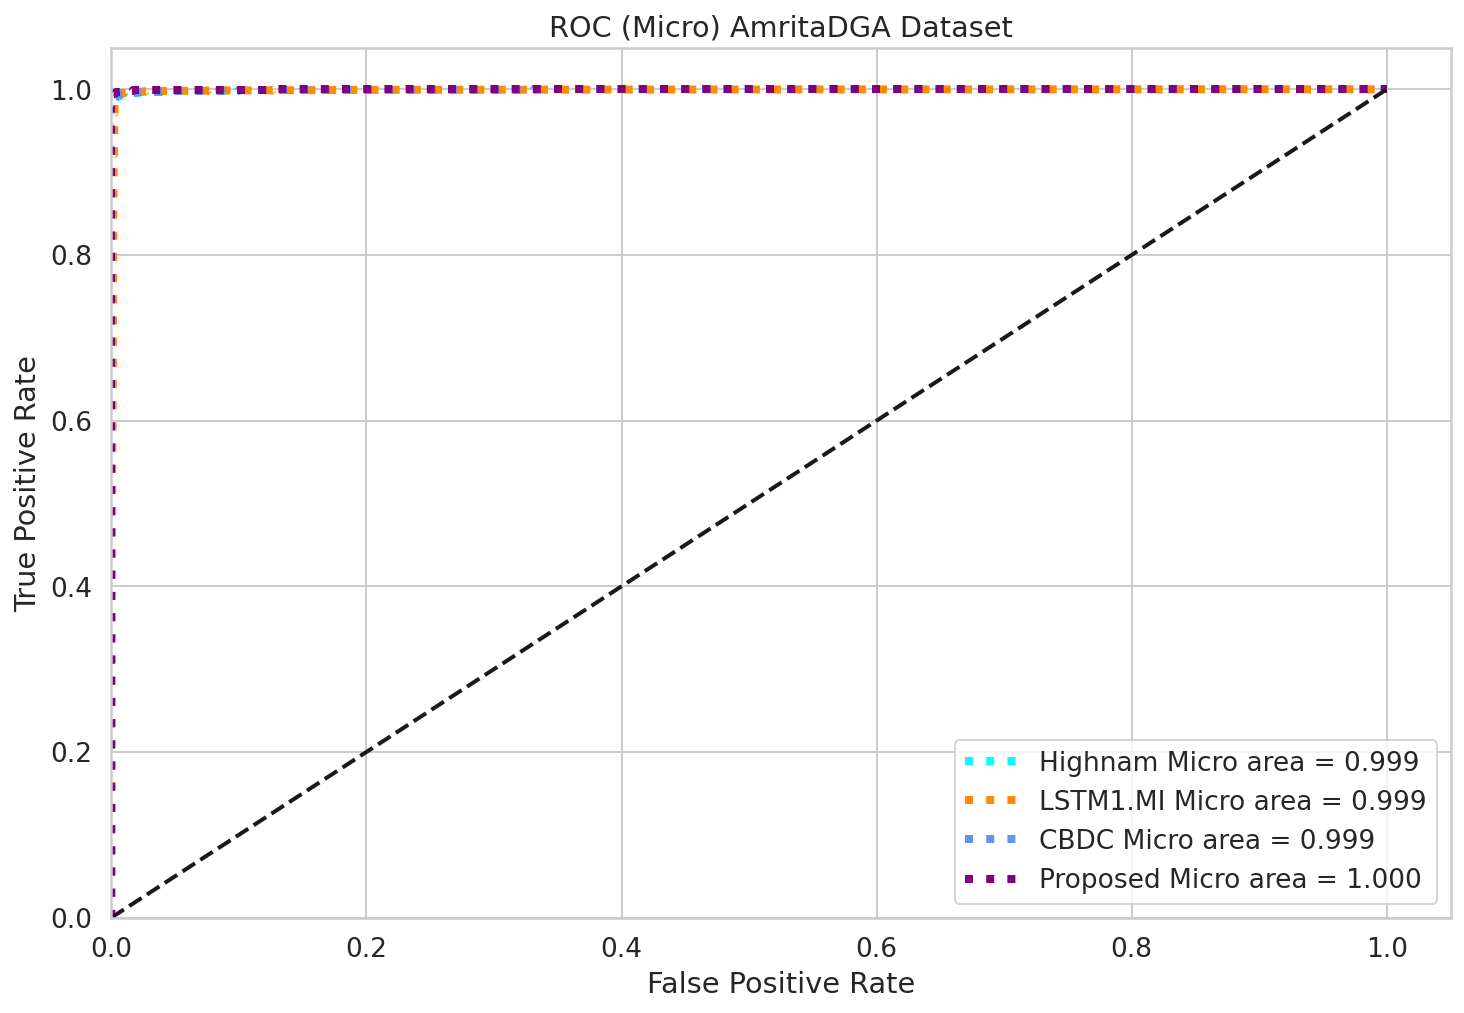

<Figure size 864x576 with 0 Axes>

In [ ]:
# Plot all ROC curves
plt.figure()
lw = 2
plt.plot(
    high_fpr["micro"],
    high_tpr["micro"],
    label="Highnam Micro area = {0:0.3f}".format(high_roc_auc["micro"]),
    color="aqua",
    linestyle=":",
    linewidth=4
)

plt.plot(
    m1_fpr["micro"],
    m1_tpr["micro"],
    label="LSTM1.MI Micro area = {0:0.3f}".format(m1_roc_auc["micro"]),
    color="darkorange",
    linestyle=":",
    linewidth=4
)

plt.plot(
    CBDC_fpr["micro"],
    CBDC_tpr["micro"],
    label="CBDC Micro area = {0:0.3f}".format(CBDC_roc_auc["micro"]),
    color="cornflowerblue",
    linestyle=":",
    linewidth=4
)

plt.plot(
    dga_fpr["micro"],
    dga_tpr["micro"],
    label="Proposed Micro area = {0:0.3f}".format(dga_roc_auc["micro"]),
    color="purple",
    linestyle=":",
    linewidth=4
)

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Micro) AmritaDGA Dataset")
plt.legend(loc="lower right")
plt.show()
plt.savefig(f"{image_path}/amrita_micro.png",dpi=300)

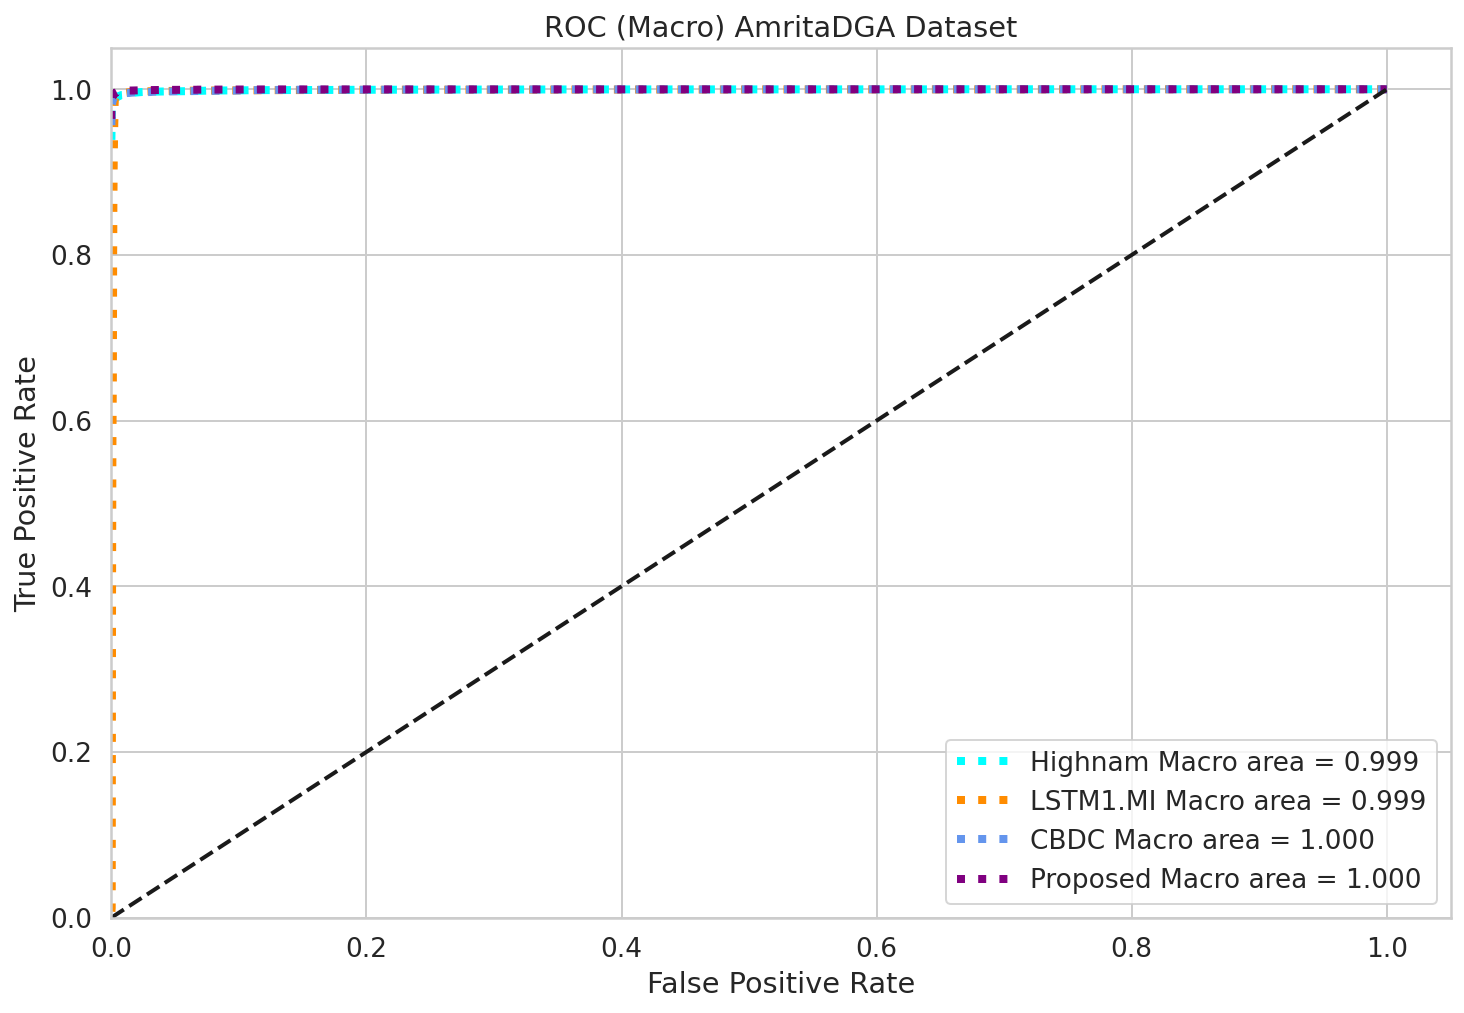

<Figure size 864x576 with 0 Axes>

In [ ]:
# Plot all ROC curves
plt.figure()
lw = 2
plt.plot(
    high_fpr["macro"],
    high_tpr["macro"],
    label="Highnam Macro area = {0:0.3f}".format(high_roc_auc["macro"]),
    color="aqua",
    linestyle=":",
    linewidth=4
)

plt.plot(
    m1_fpr["macro"],
    m1_tpr["macro"],
    label="LSTM1.MI Macro area = {0:0.3f}".format(m1_roc_auc["macro"]),
    color="darkorange",
    linestyle=":",
    linewidth=4
)

plt.plot(
    CBDC_fpr["macro"],
    CBDC_tpr["macro"],
    label="CBDC Macro area = {0:0.3f}".format(CBDC_roc_auc["macro"]),
    color="cornflowerblue",
    linestyle=":",
    linewidth=4
)

plt.plot(
    dga_fpr["macro"],
    dga_tpr["macro"],
    label="Proposed Macro area = {0:0.3f}".format(dga_roc_auc["macro"]),
    color="purple",
    linestyle=":",
    linewidth=4
)

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Macro) AmritaDGA Dataset")
plt.legend(loc="lower right")
plt.show()
plt.savefig(f"{image_path}/amrita_macro.png",dpi=300)

In [ ]:
n_classes = len(test_df.columns.tolist()[1:])
n_classes

1

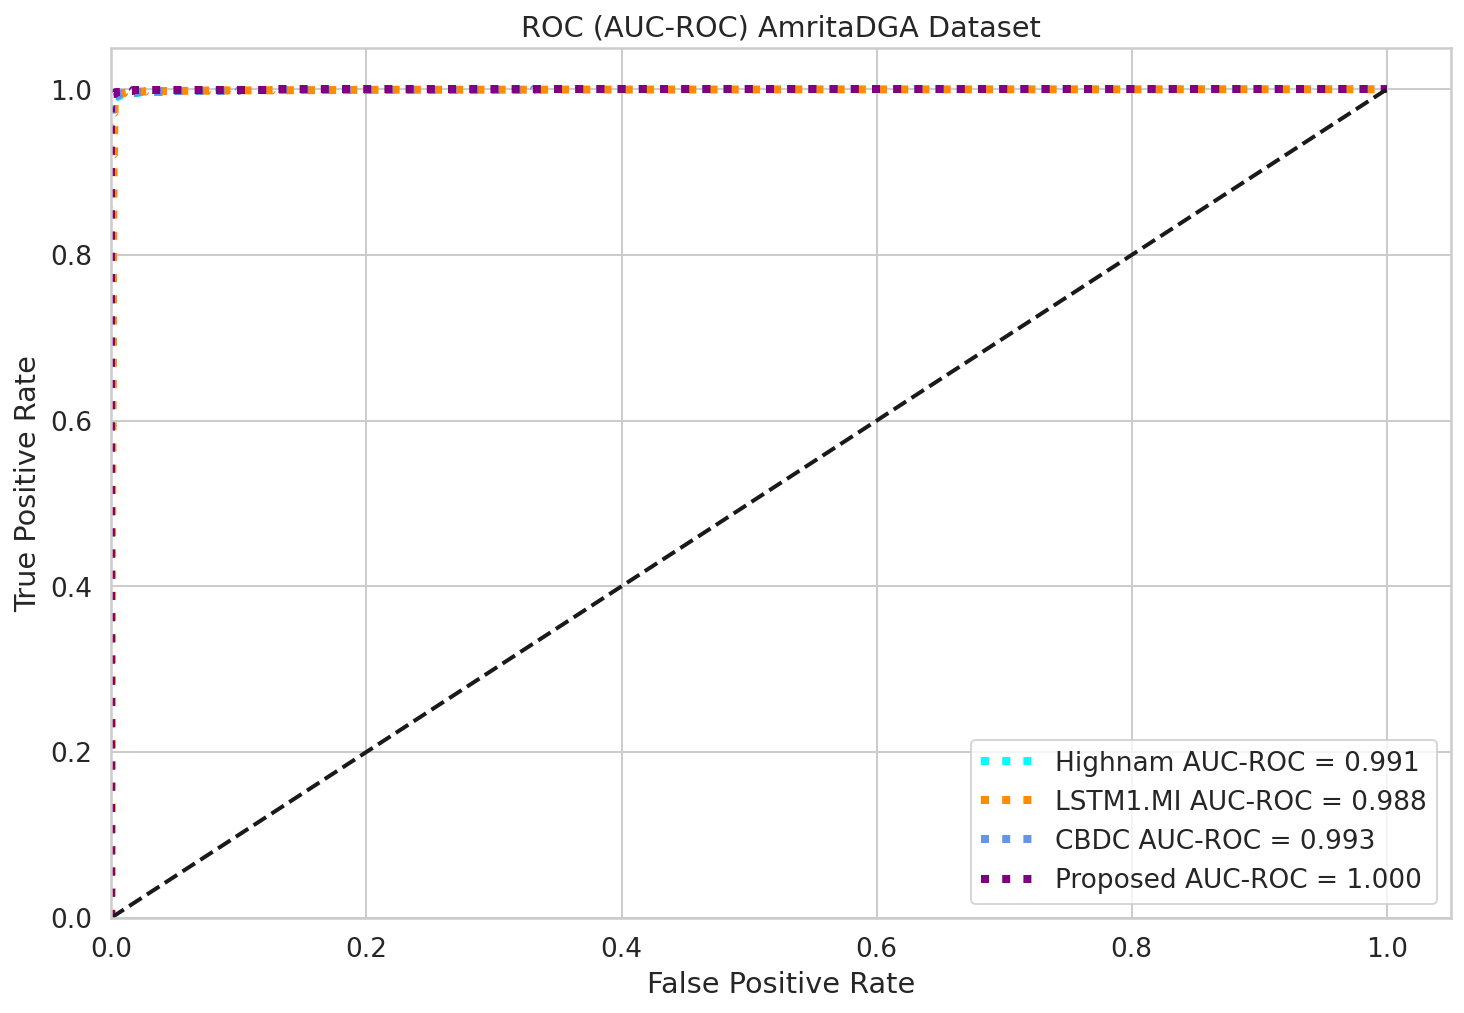

<Figure size 864x576 with 0 Axes>

In [ ]:
n_classes = len(test_df.columns.tolist()[1:])
# Plot all ROC curves
plt.figure()
lw = 2
for i in range(n_classes):
  plt.plot(
      high_fpr[0],
      high_tpr[0],
      label="Highnam AUC-ROC = {0:0.3f}".format(high_tag_auroc),
      color="aqua",
      linestyle=":",
      linewidth=4
  )

  plt.plot(
      m1_fpr[0],
      m1_tpr[0],
      label="LSTM1.MI AUC-ROC = {0:0.3f}".format(m1_tag_auroc),
      color="darkorange",
      linestyle=":",
      linewidth=4
  )

  plt.plot(
      CBDC_fpr[0],
      CBDC_tpr[0],
      label="CBDC AUC-ROC = {0:0.3f}".format(CBDC_tag_auroc),
      color="cornflowerblue",
      linestyle=":",
      linewidth=4
  )

  plt.plot(
      dga_fpr[0],
      dga_tpr[0],
      label="Proposed AUC-ROC = {0:0.3f}".format(dga_tag_auroc),
      color="purple",
      linestyle=":",
      linewidth=4
  )

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.05])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC (AUC-ROC) AmritaDGA Dataset")
  plt.legend(loc="lower right")
  plt.show()
plt.savefig(f"{image_path}/amrita_acc.png",dpi=300)

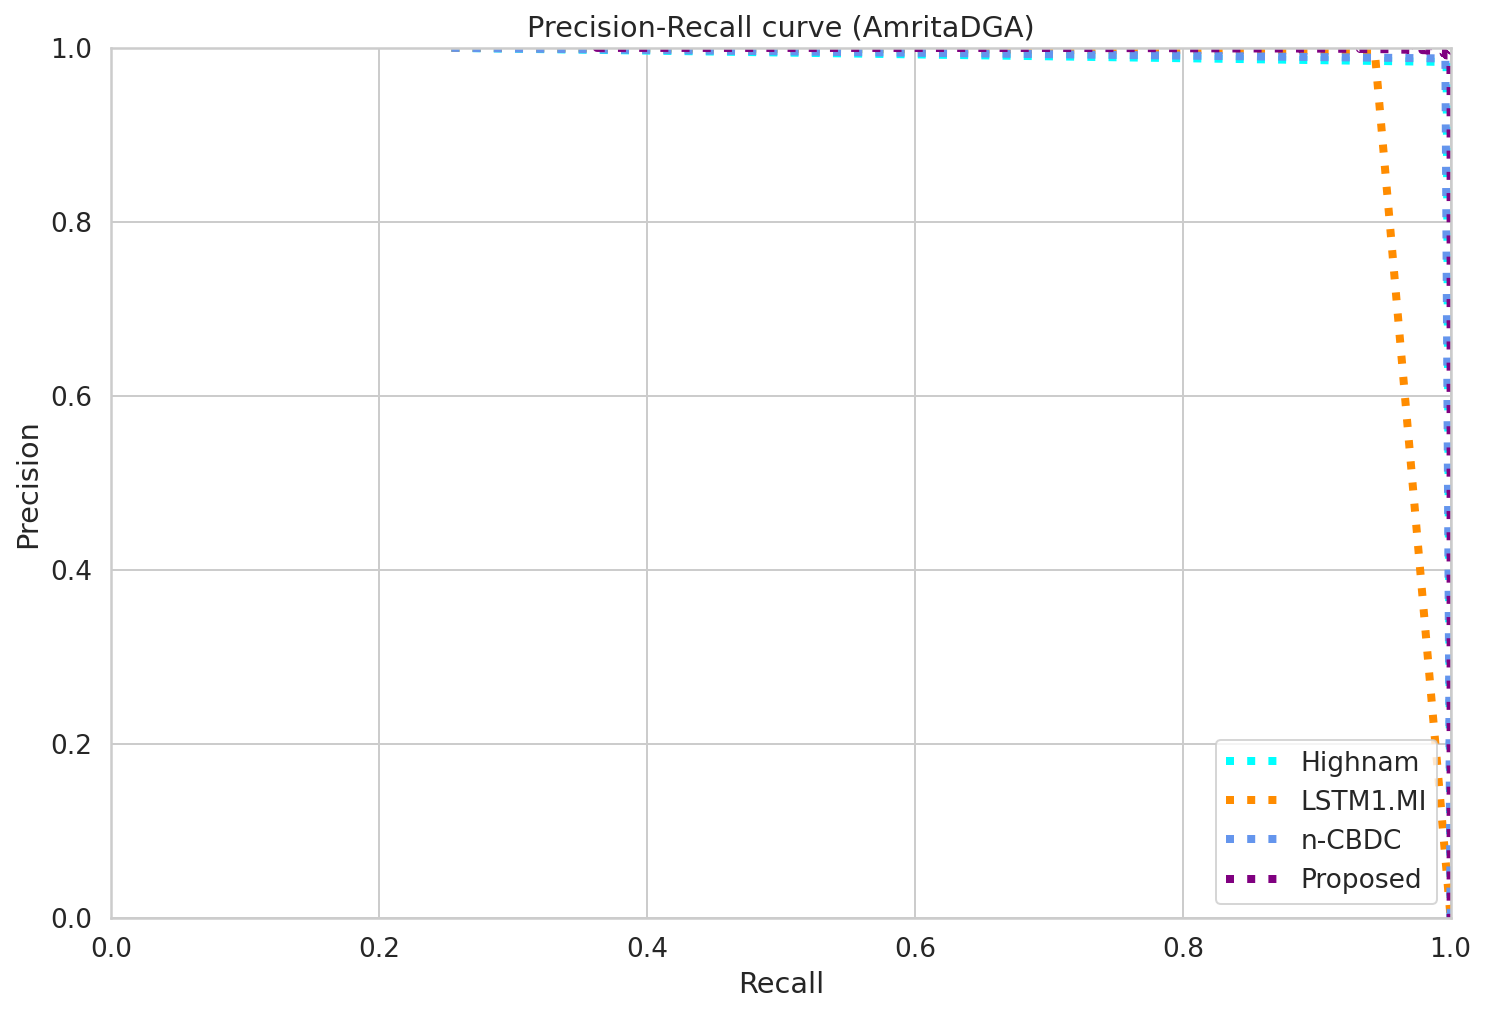

<Figure size 864x576 with 0 Axes>

In [ ]:
# Plot all Precision Recall curves
high_precision, high_recall, _ = precision_recall_curve(y_test, high_y_pred)
m1_precision, m1_recall, _ = precision_recall_curve(y_test, m1_y_pred)
CBDC_precision, CBDC_recall, _ = precision_recall_curve(y_test, CBDC_y_pred)
dga_precision, dga_recall, _ = precision_recall_curve(dga_labels.numpy(), dga_predictions.numpy())
len_benign = len(y_test[y_test==1])
len_dga = len(y_test[y_test==0])



plt.figure()
lw = 2

plt.plot(
    high_precision,
    high_recall,
    label="Highnam",
    color="aqua",
    linestyle=":",
    linewidth=4
)

plt.plot(
    m1_precision,
    m1_recall,
    label="LSTM1.MI",
    color="darkorange",
    linestyle=":",
    linewidth=4
)
plt.plot(
    CBDC_precision,
    CBDC_recall,
    label="n-CBDC",
    color="cornflowerblue",
    linestyle=":",
    linewidth=4
)
plt.plot(
    dga_precision,
    dga_recall,
    label="Proposed",
    color="purple",
    linestyle=":",
    linewidth=4
)

plt.plot([0, 1], [len_benign, len_benign], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (AmritaDGA)')
plt.legend(loc="lower right")
plt.show()
plt.savefig(f"{image_path}/amrita_prec_recall.png",dpi=300)

In [ ]:
precision = np.nan_to_num(dga_tpr[0]/(dga_tpr[0]+dga_fpr[0]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


(39778, 10100)

# ***umudga Datasets***

In [ ]:
umudga_df = umudga_df.sample(frac = 1).reset_index(drop=True) #shuffle data
umudga_df.head()

,domain,benign
0,cnbcmlabeboobeam.com,0
1,yo-sex.com,1
2,ao2cioesegug.net,0
3,imcokohocasihe.ddns.net,0
4,jbmgyiaxdg.net,0


In [ ]:
#store testing data
training_stats = []
testing_record = []
THRESHOLD, upper, lower = 0.5, 1 , 0 
device_name = utils.get_tf_device()
test_time = time.time() 
#prepare the character based tokenizer
X_test,y_test = tokenizing_tf_testdata(dataframe = umudga_df, maxlen = tf_initialize.MAX_STRING_LENGTH)



Long of characters dictionary 70


Hignnam

In [ ]:

#start testing
total_stats = {}
#with tf.device(device_name):
model_name = 'highnam.h5'
high_model = tf_models.build_highnam()

#load the pretrained model    
high_trained_model =  tf.keras.models.load_model(f'{root}models/{model_name}')
high_predictions, high_test_time = test_model(high_trained_model, X_test)
high_y_pred = np.where(high_predictions > THRESHOLD, upper, lower)

#Confusion Matrix
high_conf_matrix = confusion_matrix(y_test, high_y_pred)

#Accuracy
high_acc = accuracy_score(y_test, high_y_pred)

#Compute AUROC
print("AUROC per tag")
for i, name in enumerate([LABEL_COLUMNS[1:]]):
  high_tag_auroc = roc_auc_score(y_test, high_y_pred)
  print(f"{name}: {high_tag_auroc}")

#Compute  classification report 
high_class_rpt = classification_report(y_test, high_y_pred, digits=4)
print(high_conf_matrix)
print(high_acc)
print(high_class_rpt)

782/782 [==============================] - 6s 8ms/step
AUROC per tag
['benign']: 0.8733333333333334
[[14911    89]
 [ 2474  7526]]
0.89748
              precision    recall  f1-score   support

           0     0.8577    0.9941    0.9209     15000
           1     0.9883    0.7526    0.8545     10000

    accuracy                         0.8975     25000
   macro avg     0.9230    0.8733    0.8877     25000
weighted avg     0.9099    0.8975    0.8943     25000



In [ ]:
scores = []
for i in high_class_rpt.split(' '):
  if i !='':
    scores.append(i.strip())

prec = float(scores[-9])
recall = float(scores[-8])
fscore = float(scores[-7])
print(prec, fscore, recall)
add_stats('Highnam', 'UMU DGA', round(high_acc.item(),3), prec, fscore, recall, high_test_time, test_df[test_df['benign']==0].shape[0], test_df[test_df['benign']==1].shape[0], round(high_tag_auroc.item(),3))

0.923 0.8877 0.8733


MI

In [ ]:
X_test,y_test = tokenizing_tf_testdata(dataframe = umudga_df, maxlen = 128)
#with tf.device(device_name):
model_name = 'lstm1_mi.h5'
m1_model = tf_models.build_LSTM_MI_model(tf_initialize.MAX_INDEX, tf_initialize.MAX_STRING_LENGTH)

#load the pretrained model    
m1_trained_model =  tf.keras.models.load_model(f'{root}models/{model_name}')
m1_predictions, m1_test_time = test_model(m1_trained_model, X_test)
m1_y_pred = np.where(m1_predictions > THRESHOLD, upper, lower)

#Confusion Matrix
m1_conf_matrix = confusion_matrix(y_test, m1_y_pred)

#Accuracy
m1_acc = accuracy_score(y_test, m1_y_pred)

#Compute AUROC
print("AUROC per tag")
for i, name in enumerate([LABEL_COLUMNS[1:]]):
  m1_tag_auroc = roc_auc_score(y_test, m1_y_pred)
  print(f"{name}: {m1_tag_auroc}")

#Compute  classification report 
m1_class_rpt = classification_report(y_test, m1_y_pred, digits=4)
print(m1_conf_matrix)
print(m1_acc)
print(m1_class_rpt)

Long of characters dictionary 70
782/782 [==============================] - 3s 4ms/step
AUROC per tag
['benign']: 0.9544333333333332
[[13798  1202]
 [  110  9890]]
0.94752
              precision    recall  f1-score   support

           0     0.9921    0.9199    0.9546     15000
           1     0.8916    0.9890    0.9378     10000

    accuracy                         0.9475     25000
   macro avg     0.9419    0.9544    0.9462     25000
weighted avg     0.9519    0.9475    0.9479     25000



In [ ]:
scores = []
for i in m1_class_rpt.split(' '):
  if i !='':
    scores.append(i.strip())

prec = float(scores[-9])
recall = float(scores[-8])
fscore = float(scores[-7])
print(prec, fscore, recall)
add_stats('LSTM1.MI', 'UMU DGA', round(m1_acc.item(),3), prec, fscore, recall, m1_test_time, test_df[test_df['benign']==0].shape[0], test_df[test_df['benign']==1].shape[0], round(m1_tag_auroc.item(),3))

0.9419 0.9462 0.9544


CDBC

In [ ]:
X_test,y_test = tokenizing_tf_testdata(dataframe = umudga_df, maxlen = tf_initialize.MAX_STRING_LENGTH)
#with tf.device(device_name):
model_name = 'n-CDBC.h5'
CBDC_model = tf_models.build_CBDC()

#load the pretrained model    
CBDC_trained_model =  tf.keras.models.load_model(f'{root}models/{model_name}')
CBDC_predictions, CBDC_test_time = test_model(CBDC_trained_model, X_test)
CBDC_y_pred = np.where(CBDC_predictions > THRESHOLD, upper, lower)

#Confusion Matrix
CBDC_conf_matrix = confusion_matrix(y_test, CBDC_y_pred)

#Accuracy
CBDC_acc = accuracy_score(y_test, CBDC_y_pred)

#Compute AUROC
print("AUROC per tag")
for i, name in enumerate([LABEL_COLUMNS[1:]]):
  CBDC_tag_auroc = roc_auc_score(y_test, CBDC_y_pred)
  print(f"{name}: {CBDC_tag_auroc}")

#Compute  classification report 
CBDC_class_rpt = classification_report(y_test, CBDC_y_pred, digits=4)

print(CBDC_conf_matrix)
print(CBDC_acc)
print(CBDC_class_rpt)

Long of characters dictionary 70
782/782 [==============================] - 2s 3ms/step
AUROC per tag
['benign']: 0.8861833333333333
[[14791   209]
 [ 2137  7863]]
0.90616
              precision    recall  f1-score   support

           0     0.8738    0.9861    0.9265     15000
           1     0.9741    0.7863    0.8702     10000

    accuracy                         0.9062     25000
   macro avg     0.9239    0.8862    0.8984     25000
weighted avg     0.9139    0.9062    0.9040     25000



In [ ]:
scores = []
for i in CBDC_class_rpt.split(' '):
  if i !='':
    scores.append(i.strip())

prec = float(scores[-9])
recall = float(scores[-8])
fscore = float(scores[-7])
print(prec, fscore, recall)
add_stats('n-CBDC', 'UMU DGA', round(CBDC_acc.item(),3), prec, fscore, recall, CBDC_test_time, test_df[test_df['benign']==0].shape[0], test_df[test_df['benign']==1].shape[0], round(CBDC_tag_auroc.item(),3))

0.9239 0.8984 0.8862


DGA Transformers

In [ ]:
checkpoint = '/content/drive/MyDrive/Colab Notebooks/DGA_Version_70length/logs/lightning_logs/domain_name/version_2/checkpoints/epoch=4-step=7815.ckpt'
THRESHOLD = 0.5
dga_trained_model = DGATransformer.load_from_checkpoint(
    checkpoint, 
    LABEL_COLUMNS = test_df.columns.tolist()[1:]
)
dga_trained_model.eval()
dga_trained_model.freeze()

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'roberta.encoder.layer.4.attention.output.LayerNorm.bias', 'roberta.encoder.layer.5.intermediate.dense.bias', 'roberta.encoder.layer.5.attention.output.dense.weight', 'lm_head.layer_norm.bias', 'roberta.encoder.layer.5.attention.output.LayerNorm.bias', 'roberta.encoder.layer.4.attention.self.value.weight', 'roberta.encoder.layer.4.output.dense.weight', 'roberta.encoder.layer.4.attention.self.value.bias', 'roberta.encoder.layer.4.attention.self.key.bias', 'lm_head.decoder.weight', 'roberta.encoder.layer.5.attention.output.dense.bias', 'lm_head.dense.bias', 'roberta.encoder.layer.4.attention.self.query.weight', 'roberta.encoder.layer.5.attention.self.key.weight', 'roberta.encoder.layer.5.output.dense.weight', 'roberta.encoder.layer.5.attention.output.LayerNorm.weight', 'lm_head.bias', 'roberta.encoder.layer.5.intermediate.dense.weight', 'roberta.encoder.l

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dga_trained_model = dga_trained_model.to(device)
LABELS = umudga_df.columns.tolist()[1:]
test_dataset = DGADataset(
  umudga_df,
  tokenizer,
  max_token_len=pt_initialize.MAX_LENGTH,
  categories = LABELS
)

dga_predictions = []
dga_labels = []

t0 = time.time()
for item in tqdm(test_dataset):
  _, prediction = dga_trained_model(
    item["input_ids"].unsqueeze(dim=0).to(device), 
    item["attention_mask"].unsqueeze(dim=0).to(device)
  )
  dga_predictions.append(prediction.flatten())
  dga_labels.append(item["labels"].int())

dga_test_time = utils.format_time(time.time() - t0)


dga_predictions = torch.stack(dga_predictions).detach().cpu()
dga_labels = torch.stack(dga_labels).detach().cpu()


  0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:


dga_acc = accuracy(dga_predictions, dga_labels, threshold=THRESHOLD)
dga_y_pred = dga_predictions.numpy()
y_true = dga_labels.numpy()

upper, lower = 1, 0
dga_y_pred = np.where(dga_y_pred > THRESHOLD, upper, lower)
dga_class_rpt = classification_report(y_true, dga_y_pred, digits=4)

dga_conf_matrix = confusion_matrix(y_true, dga_y_pred)

for i, name in enumerate(test_df.columns.tolist()[1:]):
  dga_tag_auroc = auroc(dga_predictions[:, i], dga_labels[:, i], pos_label=1)

print(dga_conf_matrix)
print(dga_acc)
print(dga_class_rpt)
print(dga_tag_auroc)

[[14573   427]
 [  164  9836]]
tensor(0.9764)
              precision    recall  f1-score   support

           0     0.9889    0.9715    0.9801     15000
           1     0.9584    0.9836    0.9708     10000

    accuracy                         0.9764     25000
   macro avg     0.9736    0.9776    0.9755     25000
weighted avg     0.9767    0.9764    0.9764     25000

tensor(0.9979)


In [ ]:
scores = []
for i in dga_class_rpt.split(' '):
  if i !='':
    scores.append(i.strip())

prec = float(scores[-9])
recall = float(scores[-8])
fscore = float(scores[-7])
print(prec, fscore, recall)
add_stats('DGA-Transformer','UMU DGA', round(dga_acc.item(),3), prec, fscore, recall, dga_test_time, test_df[test_df['benign']==0].shape[0], test_df[test_df['benign']==1].shape[0], round(dga_tag_auroc.item(),3))

0.9736 0.9755 0.9776


In [ ]:
stats_df = utils.result_df(training_stats)
stats_df

,Dataset,Test Time,Accuracy,Precision,Recall,F Score,AUROC,DGA Samples,Benign Samples
Model_Name,,,,,,,,,
Highnam,UMU DGA,0:00:10.597000,0.897,0.923,0.873,0.888,0.873,29628,10150
LSTM1.MI,UMU DGA,0:00:03.392000,0.948,0.942,0.954,0.946,0.954,29628,10150
n-CBDC,UMU DGA,0:00:02.343000,0.906,0.924,0.886,0.898,0.886,29628,10150
DGA-Transformer,UMU DGA,0:02:07.955000,0.976,0.974,0.978,0.976,0.998,29628,10150


In [ ]:
stats_df.to_csv('/content/drive/MyDrive/Colab Notebooks/DGA_Version_70length/results/umu-6-6-2022-3layers.csv')

# **Draw Figures**

In [ ]:
image_path = '/content/drive/MyDrive/Colab Notebooks/DGA_Version_70length/results/images'

#get base models values
high_fpr, high_tpr, high_roc_auc = get_tf_fpr_fnr(high_predictions, y_test)
m1_fpr, m1_tpr, m1_roc_auc = get_tf_fpr_fnr(m1_predictions, y_test)
CBDC_fpr, CBDC_tpr, CBDC_roc_auc = get_tf_fpr_fnr(CBDC_predictions, y_test)

#get DGA_transformer values
dga_fpr, dga_tpr, dga_roc_auc = get_pt_fpr_tpr(dga_predictions.numpy(), dga_labels.numpy())


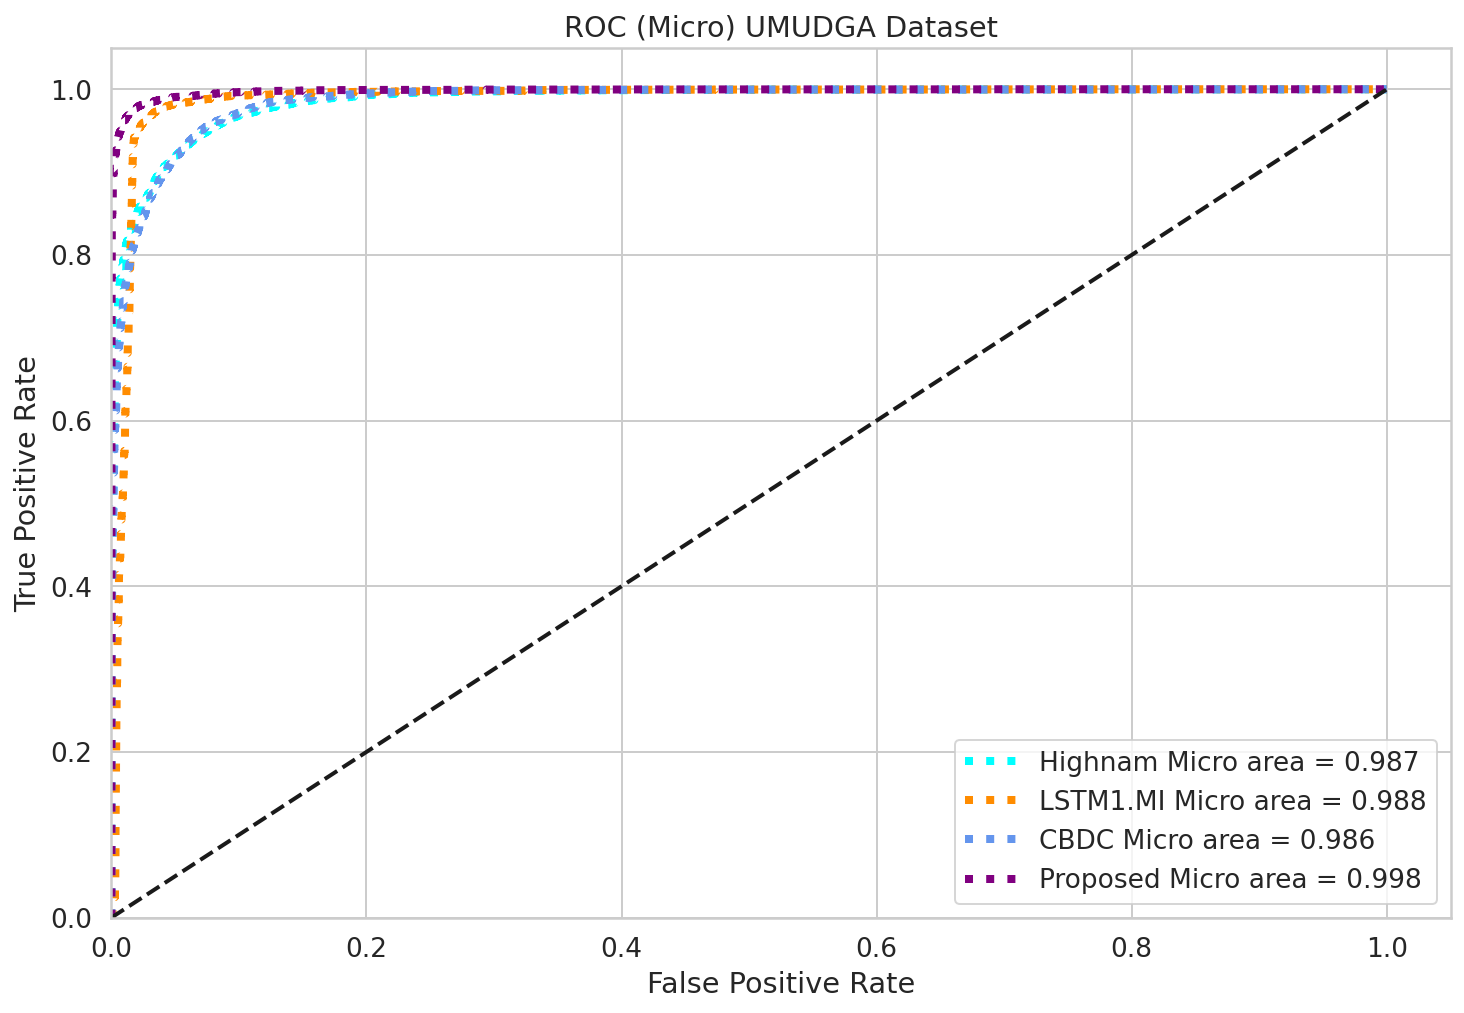

<Figure size 864x576 with 0 Axes>

In [ ]:
# Plot all ROC curves
plt.figure()
lw = 2
plt.plot(
    high_fpr["micro"],
    high_tpr["micro"],
    label="Highnam Micro area = {0:0.3f}".format(high_roc_auc["micro"]),
    color="aqua",
    linestyle=":",
    linewidth=4
)

plt.plot(
    m1_fpr["micro"],
    m1_tpr["micro"],
    label="LSTM1.MI Micro area = {0:0.3f}".format(m1_roc_auc["micro"]),
    color="darkorange",
    linestyle=":",
    linewidth=4
)

plt.plot(
    CBDC_fpr["micro"],
    CBDC_tpr["micro"],
    label="CBDC Micro area = {0:0.3f}".format(CBDC_roc_auc["micro"]),
    color="cornflowerblue",
    linestyle=":",
    linewidth=4
)

plt.plot(
    dga_fpr["micro"],
    dga_tpr["micro"],
    label="Proposed Micro area = {0:0.3f}".format(dga_roc_auc["micro"]),
    color="purple",
    linestyle=":",
    linewidth=4
)

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Micro) UMUDGA Dataset")
plt.legend(loc="lower right")
plt.show()
plt.savefig(f"{image_path}/umudga_micro.png",dpi=300)

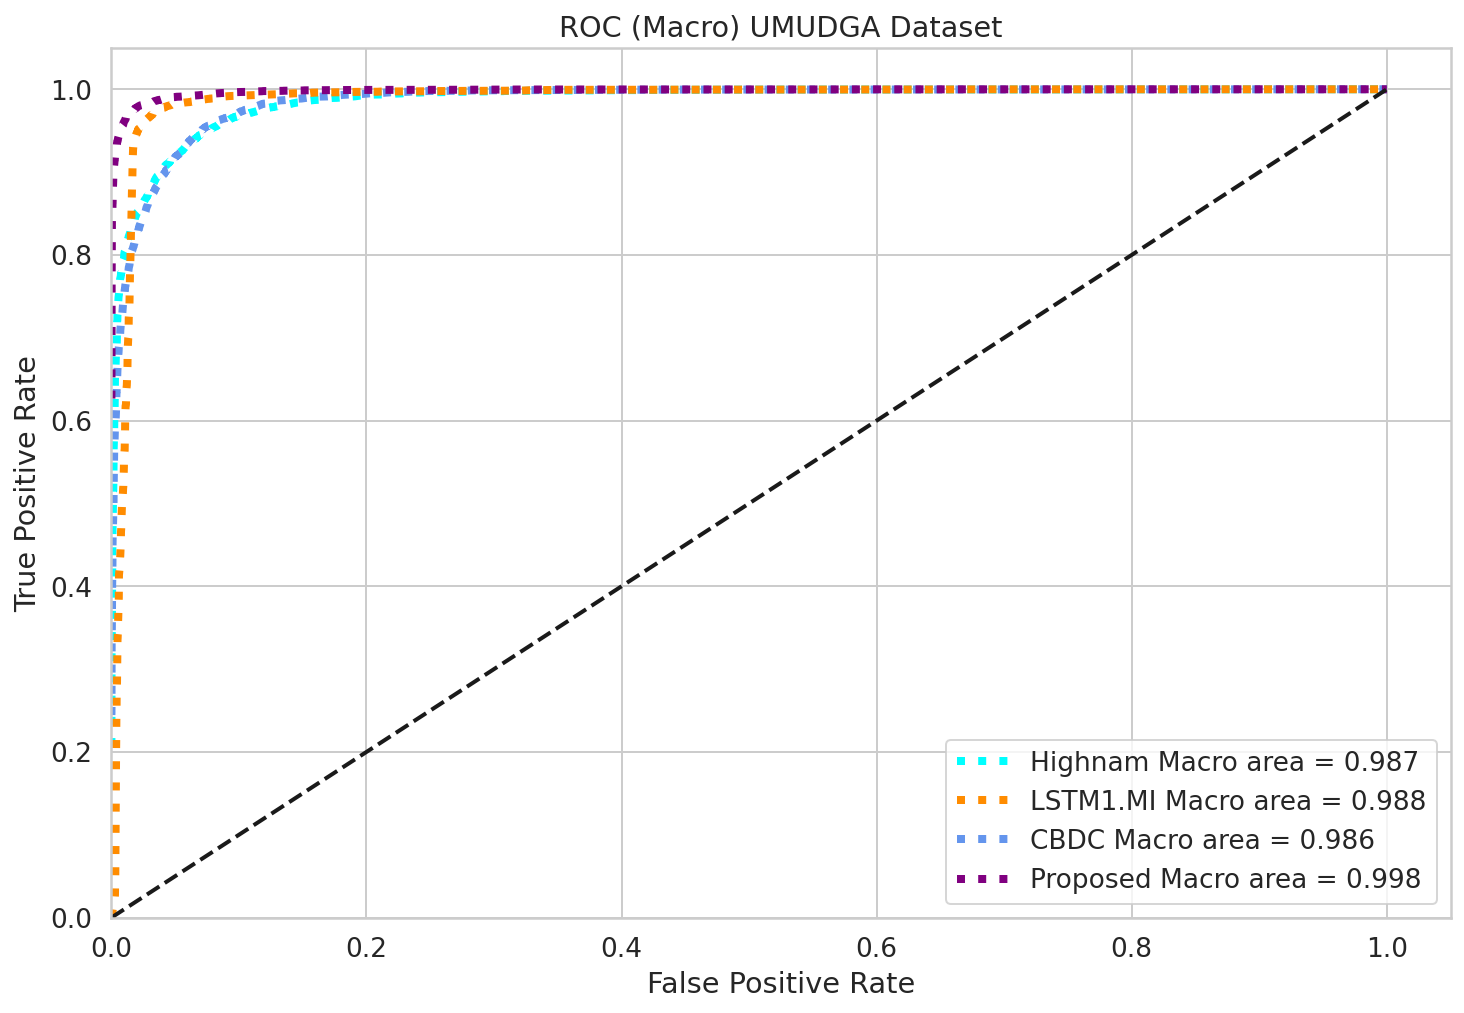

<Figure size 864x576 with 0 Axes>

In [ ]:
# Plot all ROC curves
plt.figure()
lw = 2
plt.plot(
    high_fpr["macro"],
    high_tpr["macro"],
    label="Highnam Macro area = {0:0.3f}".format(high_roc_auc["macro"]),
    color="aqua",
    linestyle=":",
    linewidth=4
)

plt.plot(
    m1_fpr["macro"],
    m1_tpr["macro"],
    label="LSTM1.MI Macro area = {0:0.3f}".format(m1_roc_auc["macro"]),
    color="darkorange",
    linestyle=":",
    linewidth=4
)

plt.plot(
    CBDC_fpr["macro"],
    CBDC_tpr["macro"],
    label="CBDC Macro area = {0:0.3f}".format(CBDC_roc_auc["macro"]),
    color="cornflowerblue",
    linestyle=":",
    linewidth=4
)

plt.plot(
    dga_fpr["macro"],
    dga_tpr["macro"],
    label="Proposed Macro area = {0:0.3f}".format(dga_roc_auc["macro"]),
    color="purple",
    linestyle=":",
    linewidth=4
)

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Macro) UMUDGA Dataset")
plt.legend(loc="lower right")
plt.show()
plt.savefig(f"{image_path}/umudga_macro.png",dpi=300)

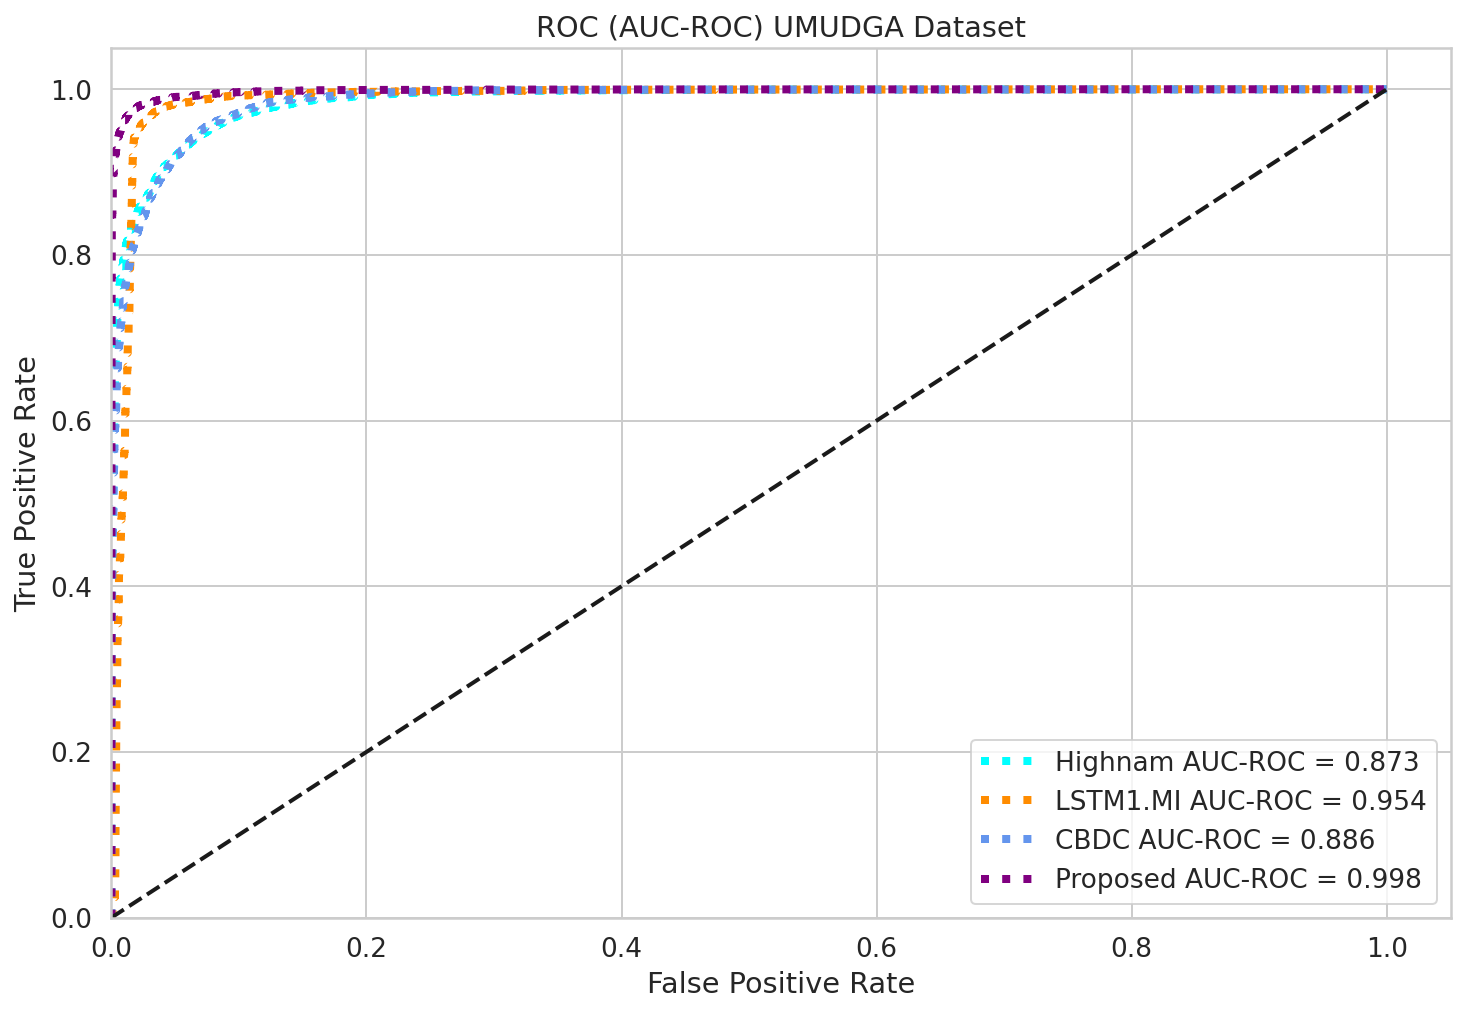

<Figure size 864x576 with 0 Axes>

In [ ]:
n_classes = len(test_df.columns.tolist()[1:])
# Plot all ROC curves
plt.figure()
lw = 2
for i in range(n_classes):
  plt.plot(
      high_fpr[0],
      high_tpr[0],
      label="Highnam AUC-ROC = {0:0.3f}".format(high_tag_auroc),
      color="aqua",
      linestyle=":",
      linewidth=4
  )

  plt.plot(
      m1_fpr[0],
      m1_tpr[0],
      label="LSTM1.MI AUC-ROC = {0:0.3f}".format(m1_tag_auroc),
      color="darkorange",
      linestyle=":",
      linewidth=4
  )

  plt.plot(
      CBDC_fpr[0],
      CBDC_tpr[0],
      label="CBDC AUC-ROC = {0:0.3f}".format(CBDC_tag_auroc),
      color="cornflowerblue",
      linestyle=":",
      linewidth=4
  )

  plt.plot(
      dga_fpr[0],
      dga_tpr[0],
      label="Proposed AUC-ROC = {0:0.3f}".format(dga_tag_auroc),
      color="purple",
      linestyle=":",
      linewidth=4
  )

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.05])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC (AUC-ROC) UMUDGA Dataset")
  plt.legend(loc="lower right")
  plt.show()
plt.savefig(f"{image_path}/umudga_auroc.png",dpi=300)

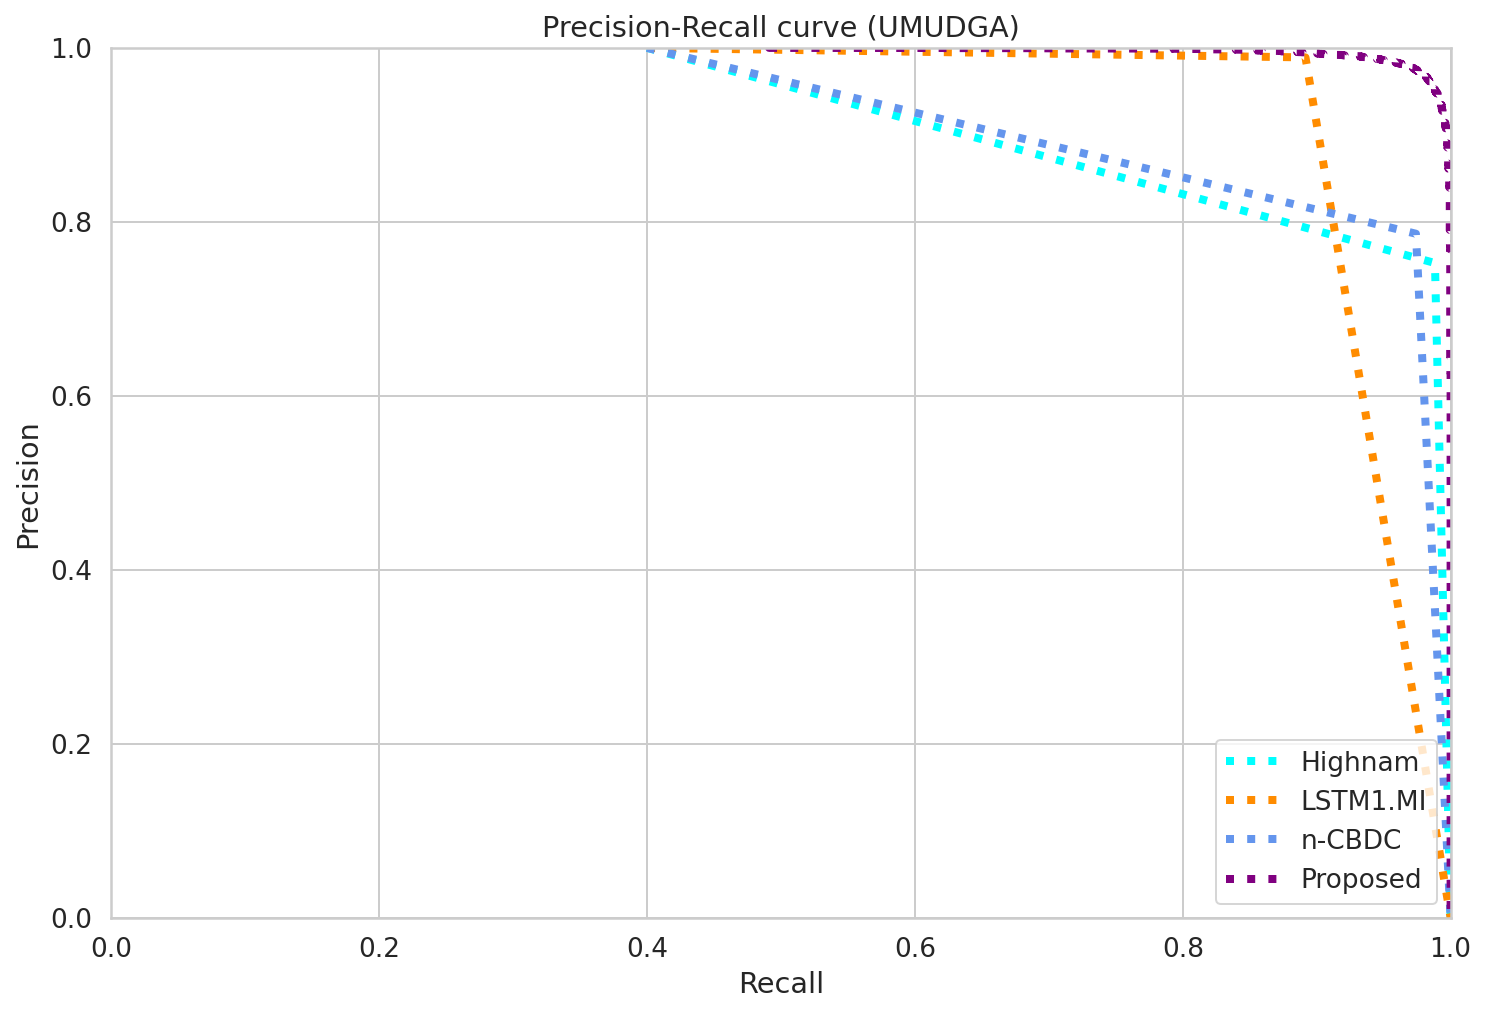

<Figure size 864x576 with 0 Axes>

In [ ]:
# Plot all Precision Recall curves
high_precision, high_recall, _ = precision_recall_curve(y_test, high_y_pred)
m1_precision, m1_recall, _ = precision_recall_curve(y_test, m1_y_pred)
CBDC_precision, CBDC_recall, _ = precision_recall_curve(y_test, CBDC_y_pred)
dga_precision, dga_recall, _ = precision_recall_curve(dga_labels.numpy(), dga_predictions.numpy())
len_benign = len(y_test[y_test==1])
len_dga = len(y_test[y_test==0])



plt.figure()
lw = 2

plt.plot(
    high_precision,
    high_recall,
    label="Highnam",
    color="aqua",
    linestyle=":",
    linewidth=4
)

plt.plot(
    m1_precision,
    m1_recall,
    label="LSTM1.MI",
    color="darkorange",
    linestyle=":",
    linewidth=4
)
plt.plot(
    CBDC_precision,
    CBDC_recall,
    label="n-CBDC",
    color="cornflowerblue",
    linestyle=":",
    linewidth=4
)
plt.plot(
    dga_precision,
    dga_recall,
    label="Proposed",
    color="purple",
    linestyle=":",
    linewidth=4
)

plt.plot([0, 1], [len_benign, len_benign], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (UMUDGA)')
plt.legend(loc="lower right")
plt.show()
plt.savefig(f"{image_path}/umudga_prec_recall.png",dpi=300)

# **Unknown Dataset (DGArchive)**

In [ ]:
unknown_df = pd.concat([
  unknown_df,
  alexa_test.sample(n=14786, random_state = 42)
]).reset_index(drop = True)
unknown_df = unknown_df.sample(frac = 1).reset_index(drop=True) #shuffle data
unknown_df.head()

,domain,benign
0,nbowgmvnrieeh.be,0
1,szrd.ir,1
2,radikal-gamez.net,1
3,14537689.top,0
4,3dd3c40f.eu,0


In [ ]:
#store testing data
training_stats = []
testing_record = []
THRESHOLD, upper, lower = 0.5, 1 , 0 
device_name = utils.get_tf_device()
test_time = time.time() 
#prepare the character based tokenizer
X_test,y_test = tokenizing_tf_testdata(dataframe = unknown_df, maxlen = tf_initialize.MAX_STRING_LENGTH)

Long of characters dictionary 70


Highnam

In [ ]:

#start testing
total_stats = {}
#with tf.device(device_name):
model_name = 'highnam.h5'
high_model = tf_models.build_highnam()

#load the pretrained model    
high_trained_model =  tf.keras.models.load_model(f'{root}models/{model_name}')
high_predictions, high_test_time = test_model(high_trained_model, X_test)
high_y_pred = np.where(high_predictions > THRESHOLD, upper, lower)

#Confusion Matrix
high_conf_matrix = confusion_matrix(y_test, high_y_pred)

#Accuracy
high_acc = accuracy_score(y_test, high_y_pred)

#Compute AUROC
print("AUROC per tag")
for i, name in enumerate([LABEL_COLUMNS[1:]]):
  high_tag_auroc = roc_auc_score(y_test, high_y_pred)
  print(f"{name}: {high_tag_auroc}")

#Compute  classification report 
high_class_rpt = classification_report(y_test, high_y_pred, digits=4)
print(high_conf_matrix)
print(high_acc)
print(high_class_rpt)

938/938 [==============================] - 8s 8ms/step
AUROC per tag
['benign']: 0.716422694638772
[[10911  4303]
 [ 4204 10582]]
0.7164333333333334
              precision    recall  f1-score   support

           0     0.7219    0.7172    0.7195     15214
           1     0.7109    0.7157    0.7133     14786

    accuracy                         0.7164     30000
   macro avg     0.7164    0.7164    0.7164     30000
weighted avg     0.7165    0.7164    0.7164     30000



In [ ]:
scores = []
for i in high_class_rpt.split(' '):
  if i !='':
    scores.append(i.strip())

prec = float(scores[-9])
recall = float(scores[-8])
fscore = float(scores[-7])
print(prec, fscore, recall)
add_stats('Highnam', 'Unknown DGA', round(high_acc.item(),3), prec, fscore, recall, high_test_time, test_df[test_df['benign']==0].shape[0], test_df[test_df['benign']==1].shape[0], round(high_tag_auroc.item(),3))

0.7164 0.7164 0.7164


MI

In [ ]:
X_test,y_test = tokenizing_tf_testdata(dataframe = unknown_df, maxlen = 128)
#with tf.device(device_name):
model_name = 'lstm1_mi.h5'
m1_model = tf_models.build_LSTM_MI_model(tf_initialize.MAX_INDEX, tf_initialize.MAX_STRING_LENGTH)

#load the pretrained model    
m1_trained_model =  tf.keras.models.load_model(f'{root}models/{model_name}')
m1_predictions, m1_test_time = test_model(m1_trained_model, X_test)
m1_y_pred = np.where(m1_predictions > THRESHOLD, upper, lower)

#Confusion Matrix
m1_conf_matrix = confusion_matrix(y_test, m1_y_pred)

#Accuracy
m1_acc = accuracy_score(y_test, m1_y_pred)

#Compute AUROC
print("AUC-ROC per tag")
for i, name in enumerate([LABEL_COLUMNS[1:]]):
  m1_tag_auroc = roc_auc_score(y_test, m1_y_pred)
  print(f"{name}: {m1_tag_auroc}")

#Compute  classification report 
m1_class_rpt = classification_report(y_test, m1_y_pred, digits=4)
print(m1_conf_matrix)
print(m1_acc)
print(m1_class_rpt)

Long of characters dictionary 70
938/938 [==============================] - 4s 4ms/step
AUC-ROC per tag
['benign']: 0.8198428778863809
[[ 9868  5346]
 [  132 14654]]
0.8174
              precision    recall  f1-score   support

           0     0.9868    0.6486    0.7827     15214
           1     0.7327    0.9911    0.8425     14786

    accuracy                         0.8174     30000
   macro avg     0.8598    0.8198    0.8126     30000
weighted avg     0.8616    0.8174    0.8122     30000



In [ ]:
scores = []
for i in m1_class_rpt.split(' '):
  if i !='':
    scores.append(i.strip())

prec = float(scores[-9])
recall = float(scores[-8])
fscore = float(scores[-7])
print(prec, fscore, recall)
add_stats('LSTM1.MI', 'Unknown DGA', round(m1_acc.item(),3), prec, fscore, recall, m1_test_time, test_df[test_df['benign']==0].shape[0], test_df[test_df['benign']==1].shape[0], round(m1_tag_auroc.item(),3))

0.8598 0.8126 0.8198


CBDC

In [ ]:
X_test,y_test = tokenizing_tf_testdata(dataframe = unknown_df, maxlen = tf_initialize.MAX_STRING_LENGTH)
#with tf.device(device_name):
model_name = 'n-CDBC.h5'
CBDC_model = tf_models.build_CBDC()

#load the pretrained model    
CBDC_trained_model =  tf.keras.models.load_model(f'{root}models/{model_name}')
CBDC_predictions, CBDC_test_time = test_model(CBDC_trained_model, X_test)
CBDC_y_pred = np.where(CBDC_predictions > THRESHOLD, upper, lower)

#Confusion Matrix
CBDC_conf_matrix = confusion_matrix(y_test, CBDC_y_pred)

#Accuracy
CBDC_acc = accuracy_score(y_test, CBDC_y_pred)

#Compute AUROC
print("AUROC per tag")
for i, name in enumerate([LABEL_COLUMNS[1:]]):
  CBDC_tag_auroc = roc_auc_score(y_test, CBDC_y_pred)
  print(f"{name}: {CBDC_tag_auroc}")

#Compute  classification report 
CBDC_class_rpt = classification_report(y_test, CBDC_y_pred, digits=4)

print(CBDC_conf_matrix)
print(CBDC_acc)
print(CBDC_class_rpt)

Long of characters dictionary 70
938/938 [==============================] - 3s 3ms/step
AUROC per tag
['benign']: 0.7110680180931405
[[10248  4966]
 [ 3718 11068]]
0.7105333333333334
              precision    recall  f1-score   support

           0     0.7338    0.6736    0.7024     15214
           1     0.6903    0.7485    0.7182     14786

    accuracy                         0.7105     30000
   macro avg     0.7120    0.7111    0.7103     30000
weighted avg     0.7123    0.7105    0.7102     30000



In [ ]:
scores = []
for i in CBDC_class_rpt.split(' '):
  if i !='':
    scores.append(i.strip())

prec = float(scores[-9])
recall = float(scores[-8])
fscore = float(scores[-7])
print(prec, fscore, recall)
add_stats('n-CBDC', 'Unknown DGA', round(CBDC_acc.item(),3), prec, fscore, recall, CBDC_test_time, test_df[test_df['benign']==0].shape[0], test_df[test_df['benign']==1].shape[0], round(CBDC_tag_auroc.item(),3))

0.712 0.7103 0.7111


DGA Transformers

In [ ]:
checkpoint = '/content/drive/MyDrive/Colab Notebooks/DGA_Version_70length/logs/lightning_logs/domain_name/version_2/checkpoints/epoch=4-step=7815.ckpt'
THRESHOLD = 0.5
dga_trained_model = DGATransformer.load_from_checkpoint(
    checkpoint, 
    LABEL_COLUMNS = test_df.columns.tolist()[1:]
)
dga_trained_model.eval()
dga_trained_model.freeze()

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'roberta.encoder.layer.4.attention.output.LayerNorm.bias', 'roberta.encoder.layer.5.intermediate.dense.bias', 'roberta.encoder.layer.5.attention.output.dense.weight', 'lm_head.layer_norm.bias', 'roberta.encoder.layer.5.attention.output.LayerNorm.bias', 'roberta.encoder.layer.4.attention.self.value.weight', 'roberta.encoder.layer.4.output.dense.weight', 'roberta.encoder.layer.4.attention.self.value.bias', 'roberta.encoder.layer.4.attention.self.key.bias', 'lm_head.decoder.weight', 'roberta.encoder.layer.5.attention.output.dense.bias', 'lm_head.dense.bias', 'roberta.encoder.layer.4.attention.self.query.weight', 'roberta.encoder.layer.5.attention.self.key.weight', 'roberta.encoder.layer.5.output.dense.weight', 'roberta.encoder.layer.5.attention.output.LayerNorm.weight', 'lm_head.bias', 'roberta.encoder.layer.5.intermediate.dense.weight', 'roberta.encoder.l

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dga_trained_model = dga_trained_model.to(device)
LABELS = unknown_df.columns.tolist()[1:]
test_dataset = DGADataset(
  unknown_df,
  tokenizer,
  max_token_len=pt_initialize.MAX_LENGTH,
  categories = LABELS
)

dga_predictions = []
dga_labels = []

t0 = time.time()
for item in tqdm(test_dataset):
  _, prediction = dga_trained_model(
    item["input_ids"].unsqueeze(dim=0).to(device), 
    item["attention_mask"].unsqueeze(dim=0).to(device)
  )
  dga_predictions.append(prediction.flatten())
  dga_labels.append(item["labels"].int())

dga_test_time = utils.format_time(time.time() - t0)


dga_predictions = torch.stack(dga_predictions).detach().cpu()
dga_labels = torch.stack(dga_labels).detach().cpu()


  0%|          | 0/30000 [00:00<?, ?it/s]

In [ ]:


dga_acc = accuracy(dga_predictions, dga_labels, threshold=THRESHOLD)
dga_y_pred = dga_predictions.numpy()
y_true = dga_labels.numpy()

upper, lower = 1, 0
dga_y_pred = np.where(dga_y_pred > THRESHOLD, upper, lower)
dga_class_rpt = classification_report(y_true, dga_y_pred, digits=4)

dga_conf_matrix = confusion_matrix(y_true, dga_y_pred)

for i, name in enumerate(test_df.columns.tolist()[1:]):
  dga_tag_auroc = auroc(dga_predictions[:, i], dga_labels[:, i], pos_label=1)

print(dga_conf_matrix)
print(dga_acc)
print(dga_class_rpt)
print(dga_tag_auroc)

[[10426  4788]
 [  186 14600]]
tensor(0.8342)
              precision    recall  f1-score   support

           0     0.9825    0.6853    0.8074     15214
           1     0.7530    0.9874    0.8545     14786

    accuracy                         0.8342     30000
   macro avg     0.8678    0.8364    0.8309     30000
weighted avg     0.8694    0.8342    0.8306     30000

tensor(0.9375)


In [ ]:
scores = []
for i in dga_class_rpt.split(' '):
  if i !='':
    scores.append(i.strip())

prec = float(scores[-9])
recall = float(scores[-8])
fscore = float(scores[-7])
print(prec, fscore, recall)
add_stats('DGA-Transformer','Unknown DGA', round(dga_acc.item(),3), prec, fscore, recall, dga_test_time, test_df[test_df['benign']==0].shape[0], test_df[test_df['benign']==1].shape[0], round(dga_tag_auroc.item(),3))

0.8678 0.8309 0.8364


Results

In [ ]:
stats_df = utils.result_df(training_stats)
stats_df

,Dataset,Test Time,Accuracy,Precision,Recall,F Score,AUROC,DGA Samples,Benign Samples
Model_Name,,,,,,,,,
Highnam,Unknown DGA,0:00:10.596000,0.716,0.716,0.716,0.716,0.716,29628,10150
LSTM1.MI,Unknown DGA,0:00:05.421000,0.817,0.860,0.820,0.813,0.820,29628,10150
n-CBDC,Unknown DGA,0:00:02.802000,0.711,0.712,0.711,0.710,0.711,29628,10150
DGA-Transformer,Unknown DGA,0:02:34.963000,0.834,0.868,0.836,0.831,0.938,29628,10150


In [ ]:
stats_df.to_csv('/content/drive/MyDrive/Colab Notebooks/DGA_Version_70length/results/unknown-6-6-2022-3layers.csv')

# **Draw Figures**

In [ ]:
image_path = '/content/drive/MyDrive/Colab Notebooks/DGA_Version_70length/results/images'

#get base models values
high_fpr, high_tpr, high_roc_auc = get_tf_fpr_fnr(high_predictions, y_test)
m1_fpr, m1_tpr, m1_roc_auc = get_tf_fpr_fnr(m1_predictions, y_test)
CBDC_fpr, CBDC_tpr, CBDC_roc_auc = get_tf_fpr_fnr(CBDC_predictions, y_test)

#get DGA_transformer values
dga_fpr, dga_tpr, dga_roc_auc = get_pt_fpr_tpr(dga_predictions.numpy(), dga_labels.numpy())


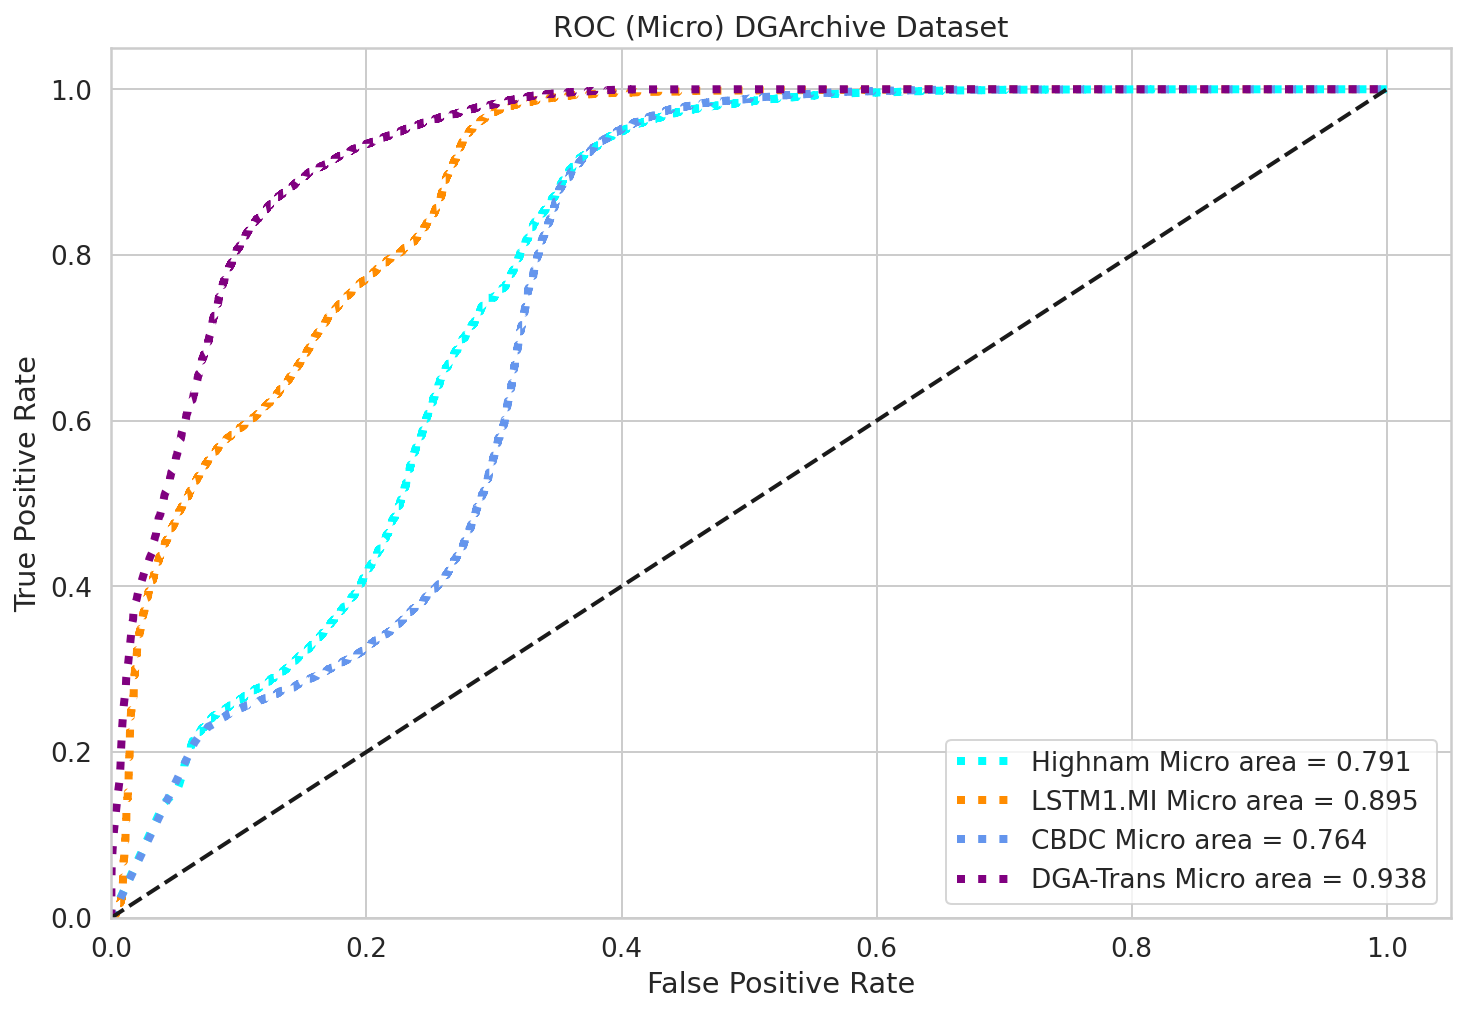

<Figure size 864x576 with 0 Axes>

In [ ]:
# Plot all ROC curves
plt.figure()
lw = 2
plt.plot(
    high_fpr["micro"],
    high_tpr["micro"],
    label="Highnam Micro area = {0:0.3f}".format(high_roc_auc["micro"]),
    color="aqua",
    linestyle=":",
    linewidth=4
)

plt.plot(
    m1_fpr["micro"],
    m1_tpr["micro"],
    label="LSTM1.MI Micro area = {0:0.3f}".format(m1_roc_auc["micro"]),
    color="darkorange",
    linestyle=":",
    linewidth=4
)

plt.plot(
    CBDC_fpr["micro"],
    CBDC_tpr["micro"],
    label="CBDC Micro area = {0:0.3f}".format(CBDC_roc_auc["micro"]),
    color="cornflowerblue",
    linestyle=":",
    linewidth=4
)

plt.plot(
    dga_fpr["micro"],
    dga_tpr["micro"],
    label="DGA-Trans Micro area = {0:0.3f}".format(dga_roc_auc["micro"]),
    color="purple",
    linestyle=":",
    linewidth=4
)

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Micro) DGArchive Dataset")
plt.legend(loc="lower right")
plt.show()
plt.savefig(f"{image_path}/unknown_micro.png",dpi=300)

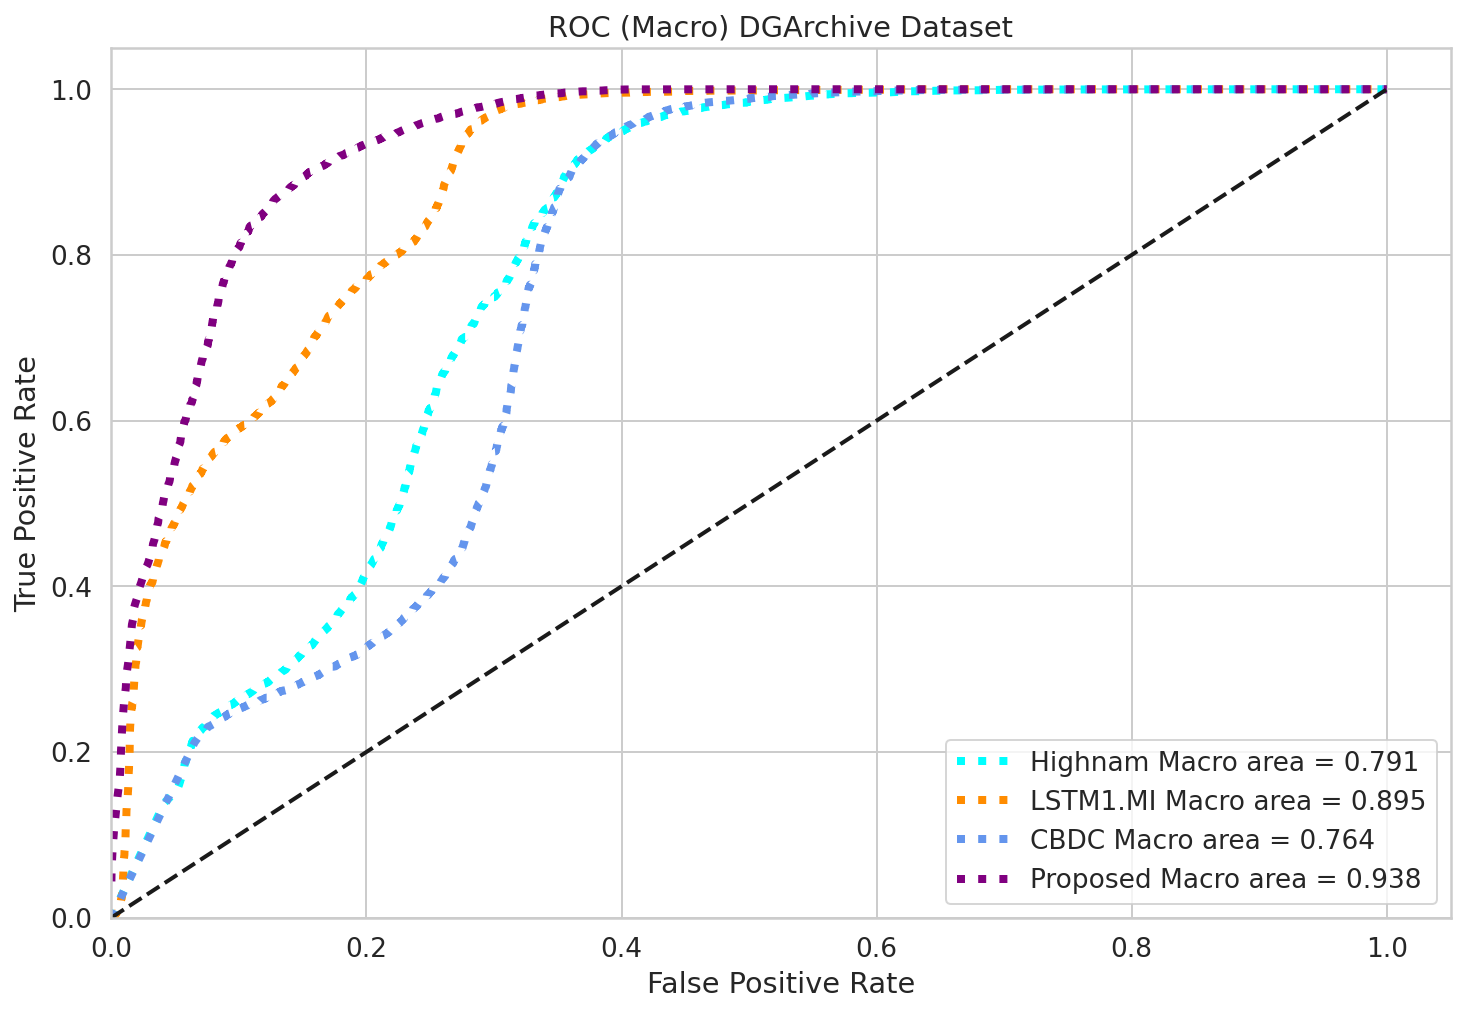

<Figure size 864x576 with 0 Axes>

In [ ]:
# Plot all ROC curves
plt.figure()
lw = 2
plt.plot(
    high_fpr["macro"],
    high_tpr["macro"],
    label="Highnam Macro area = {0:0.3f}".format(high_roc_auc["macro"]),
    color="aqua",
    linestyle=":",
    linewidth=4
)

plt.plot(
    m1_fpr["macro"],
    m1_tpr["macro"],
    label="LSTM1.MI Macro area = {0:0.3f}".format(m1_roc_auc["macro"]),
    color="darkorange",
    linestyle=":",
    linewidth=4
)

plt.plot(
    CBDC_fpr["macro"],
    CBDC_tpr["macro"],
    label="CBDC Macro area = {0:0.3f}".format(CBDC_roc_auc["macro"]),
    color="cornflowerblue",
    linestyle=":",
    linewidth=4
)

plt.plot(
    dga_fpr["macro"],
    dga_tpr["macro"],
    label="Proposed Macro area = {0:0.3f}".format(dga_roc_auc["macro"]),
    color="purple",
    linestyle=":",
    linewidth=4
)

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Macro) DGArchive Dataset")
plt.legend(loc="lower right")
plt.show()
plt.savefig(f"{image_path}/unknown_macro.png",dpi=300)

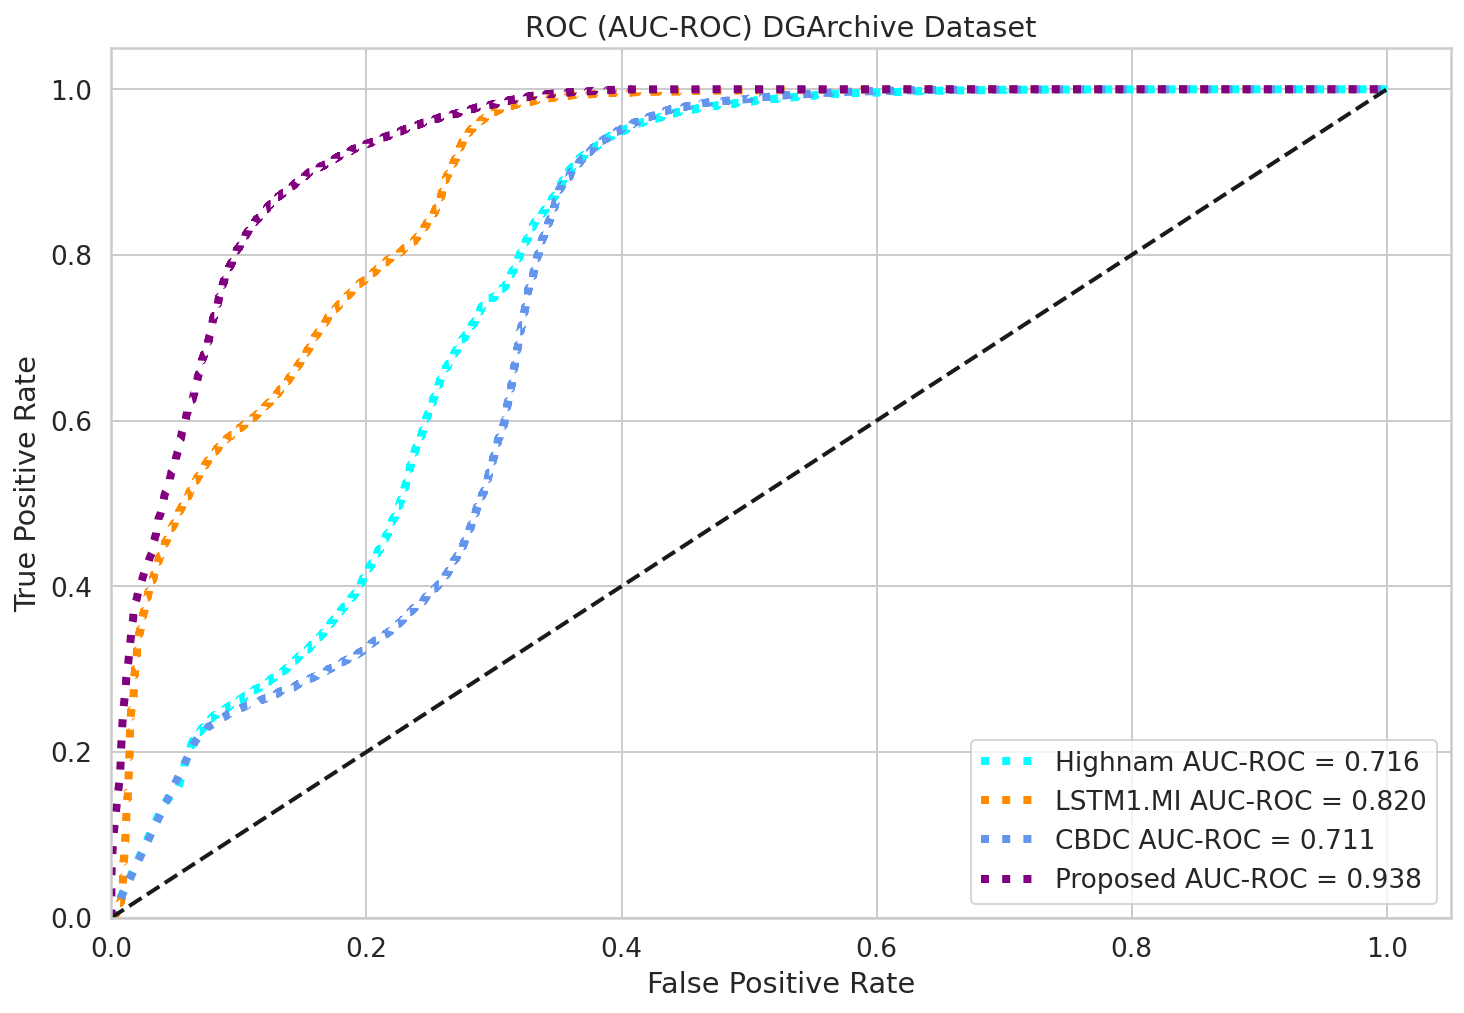

<Figure size 864x576 with 0 Axes>

In [ ]:
n_classes = len(test_df.columns.tolist()[1:])
# Plot all ROC curves
plt.figure()
lw = 2
for i in range(n_classes):
  plt.plot(
      high_fpr[0],
      high_tpr[0],
      label="Highnam AUC-ROC = {0:0.3f}".format(high_tag_auroc),
      color="aqua",
      linestyle=":",
      linewidth=4
  )

  plt.plot(
      m1_fpr[0],
      m1_tpr[0],
      label="LSTM1.MI AUC-ROC = {0:0.3f}".format(m1_tag_auroc),
      color="darkorange",
      linestyle=":",
      linewidth=4
  )

  plt.plot(
      CBDC_fpr[0],
      CBDC_tpr[0],
      label="CBDC AUC-ROC = {0:0.3f}".format(CBDC_tag_auroc),
      color="cornflowerblue",
      linestyle=":",
      linewidth=4
  )

  plt.plot(
      dga_fpr[0],
      dga_tpr[0],
      label="Proposed AUC-ROC = {0:0.3f}".format(dga_tag_auroc),
      color="purple",
      linestyle=":",
      linewidth=4
  )

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.05])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC (AUC-ROC) DGArchive Dataset")
  plt.legend(loc="lower right")
  plt.show()
plt.savefig(f"{image_path}/unknown_auroc.png",dpi=300)

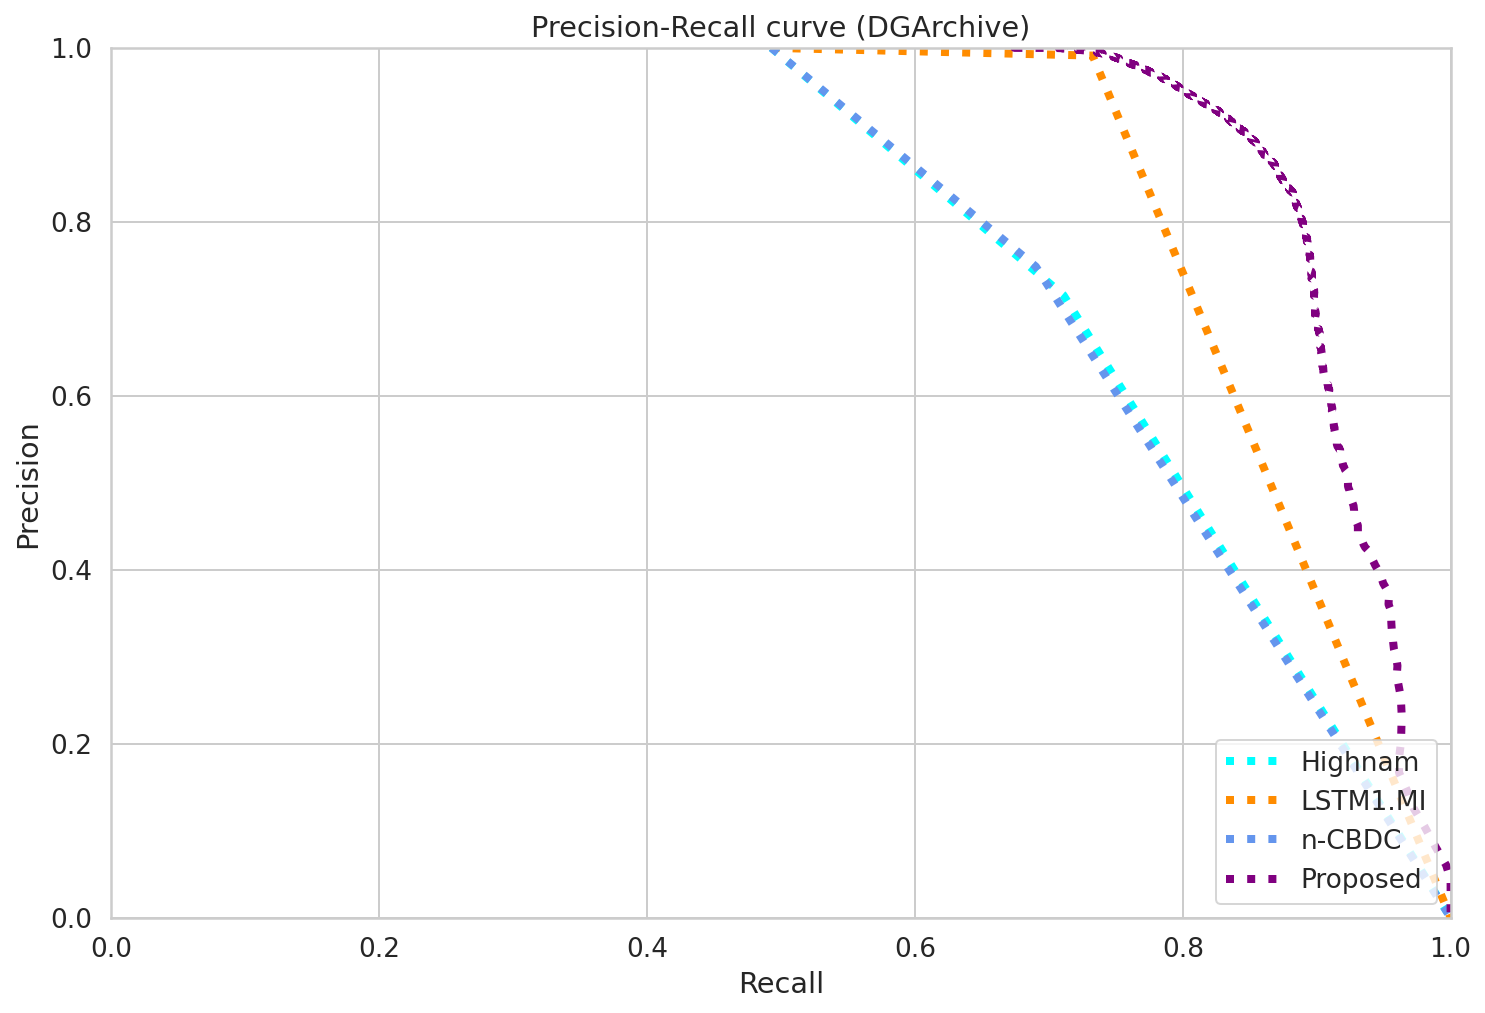

<Figure size 864x576 with 0 Axes>

In [ ]:
# Plot all Precision Recall curves
high_precision, high_recall, _ = precision_recall_curve(y_test, high_y_pred)
m1_precision, m1_recall, _ = precision_recall_curve(y_test, m1_y_pred)
CBDC_precision, CBDC_recall, _ = precision_recall_curve(y_test, CBDC_y_pred)
dga_precision, dga_recall, _ = precision_recall_curve(dga_labels.numpy(), dga_predictions.numpy())
len_benign = len(y_test[y_test==1])
len_dga = len(y_test[y_test==0])



plt.figure()
lw = 2

plt.plot(
    high_precision,
    high_recall,
    label="Highnam",
    color="aqua",
    linestyle=":",
    linewidth=4
)

plt.plot(
    m1_precision,
    m1_recall,
    label="LSTM1.MI",
    color="darkorange",
    linestyle=":",
    linewidth=4
)
plt.plot(
    CBDC_precision,
    CBDC_recall,
    label="n-CBDC",
    color="cornflowerblue",
    linestyle=":",
    linewidth=4
)
plt.plot(
    dga_precision,
    dga_recall,
    label="Proposed",
    color="purple",
    linestyle=":",
    linewidth=4
)

plt.plot([0, 1], [len_benign, len_benign], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (DGArchive)')
plt.legend(loc="lower right")
plt.show()
plt.savefig(f"{image_path}/unknown_prec_recall.png",dpi=300)